In [ ]:
dataset_name = "all"
eval_protocol = "vq"
best_f1_epoch = 56  
best_acc_epoch = 30 
log_path = f"./checkpoints/{dataset_name}/{eval_protocol}/reconstruction.log"
score_path = f"./checkpoints/{dataset_name}/{eval_protocol}/output/loss_and_score.pkl"


In [2]:
import re
import matplotlib.pyplot as plt

if eval_protocol == "recons":

    # Step 行正则匹配
    step_pattern = re.compile(
        r"Step\s+(\d+)\s+\|\s+loss:\s+([0-9.]+)\s+\|\s+Acc\s+([0-9.]+)\s+\|\s+Recall\s+([0-9.]+)\s+\|\s+Precision\s+([0-9.]+)\s+\|\s+F1\s+([0-9.]+)"
    )

    # Epoch 行正则匹配
    epoch_pattern = re.compile(
        r"Ep\s+(\d+)\s+\|\s+loss:\s+([0-9.]+)\s+\|\s+val loss:\s+([0-9.]+)\s+\|\s+acc:\s+([0-9.]+)\s+\|\s+f1:\s+([0-9.]+)"
    )

    # 存储 step 数据
    steps = []
    step_loss, step_acc, step_recall, step_precision, step_f1 = [], [], [], [], []

    # 存储 epoch 数据
    epochs, epoch_loss, epoch_valloss, epoch_acc, epoch_f1 = [], [], [], [], []

    # 读取 log 并提取数据
    with open(log_path, "r") as f:
        for line in f:
            step_match = step_pattern.search(line)
            if step_match:
                steps.append(int(step_match.group(1)))
                step_loss.append(float(step_match.group(2)))
                step_acc.append(float(step_match.group(3)))
                step_recall.append(float(step_match.group(4)))
                step_precision.append(float(step_match.group(5)))
                step_f1.append(float(step_match.group(6)))
            
            epoch_match = epoch_pattern.search(line)
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))
                epoch_loss.append(float(epoch_match.group(2)))
                epoch_valloss.append(float(epoch_match.group(3)))
                epoch_acc.append(float(epoch_match.group(4)))
                epoch_f1.append(float(epoch_match.group(5)))

    steps = [i for i in range(10, 10*len(step_loss)+1, 10)]
    # ======================
    # Step-wise 5个指标曲线图
    # ======================
    fig, axs = plt.subplots(1, 5, figsize=(25, 4), sharex=False)

    axs[0].plot(steps, step_loss, label="Loss", color='blue')
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Step-wise Loss")

    axs[1].plot(steps, step_acc, label="Accuracy", color='green')
    axs[1].set_ylabel("Accuracy")
    axs[1].set_title("Step-wise Accuracy")

    axs[2].plot(steps, step_recall, label="Recall", color='orange')
    axs[2].set_ylabel("Recall")
    axs[2].set_title("Step-wise Recall")

    axs[3].plot(steps, step_precision, label="Precision", color='red')
    axs[3].set_ylabel("Precision")
    axs[3].set_title("Step-wise Precision")

    axs[4].plot(steps, step_f1, label="F1 Score", color='purple')
    axs[4].set_ylabel("F1 Score")
    axs[4].set_title("Step-wise F1 Score")
    axs[4].set_xlabel("Step")

    for ax in axs:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

    # ======================
    # Epoch-wise Loss 和 Accuracy
    # ======================
    if epochs:
        fig, axs = plt.subplots(1, 5, figsize=(25, 4))  # 一行N列子图

        axs[0].plot(epochs, epoch_loss, label="Epoch Loss", marker='o', markersize=3, color='blue')
        axs[0].set_title("Epoch-wise Loss")
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Loss")
        axs[0].grid(True)

        axs[1].plot(epochs[1:], epoch_loss[1:], label="Epoch Loss without first epoch", marker='o', markersize=3, color='blue')
        axs[1].set_title("Epoch-wise Loss (without first epoch)")
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("Loss")
        axs[1].grid(True)

        axs[2].plot(epochs, epoch_valloss, label="Epoch Val Loss", marker='o', markersize=3, color='red')
        axs[2].set_title("Epoch-wise Val Loss")
        axs[2].set_xlabel("Epoch")
        axs[2].set_ylabel("Val Loss")
        axs[2].grid(True)

        axs[3].plot(epochs, epoch_acc, label="Epoch Acc", marker='x', markersize=3, color='green')
        axs[3].set_title("Epoch-wise Accuracy")
        axs[3].set_xlabel("Epoch")
        axs[3].set_ylabel("Accuracy")
        axs[3].grid(True)

        axs[4].plot(epochs, epoch_f1, label="Epoch F1", marker='^', markersize=3, color='purple')
        axs[4].set_title("Epoch-wise F1 Score")
        axs[4].set_xlabel("Epoch")
        axs[4].set_ylabel("F1 Score")
        axs[4].grid(True)

        plt.tight_layout()
        plt.show()



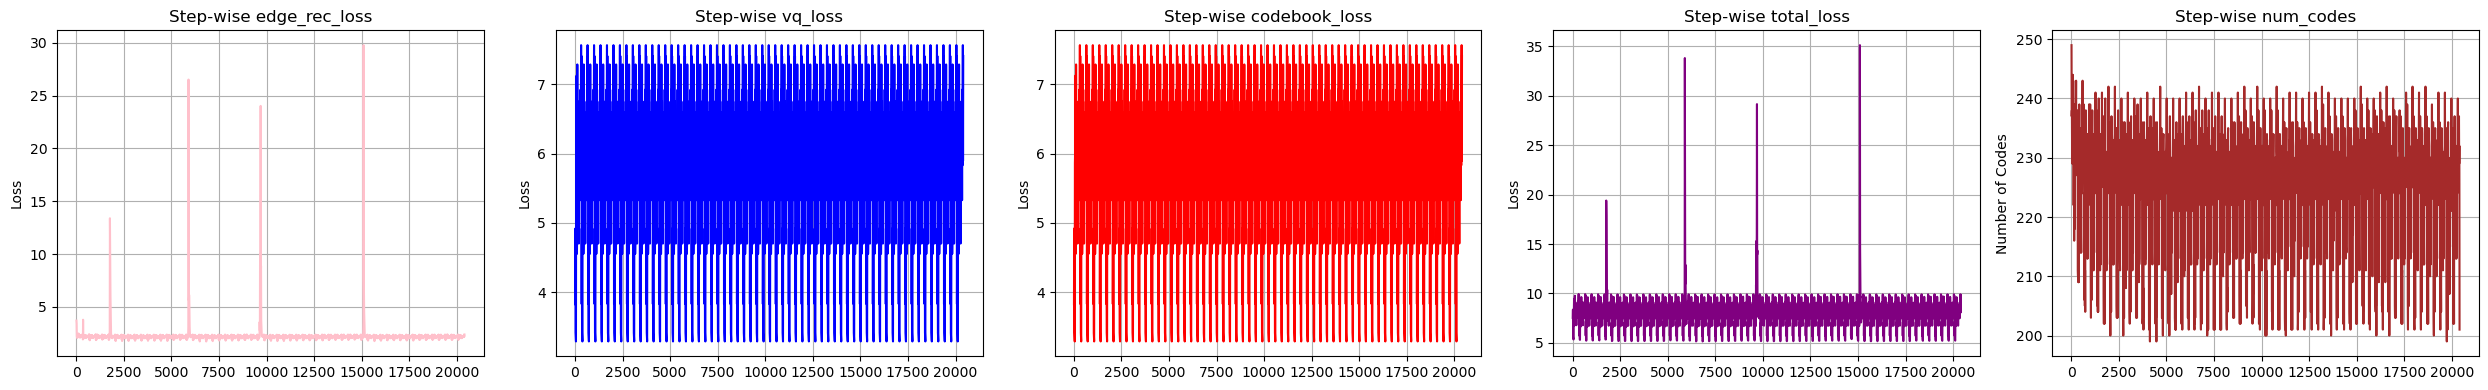

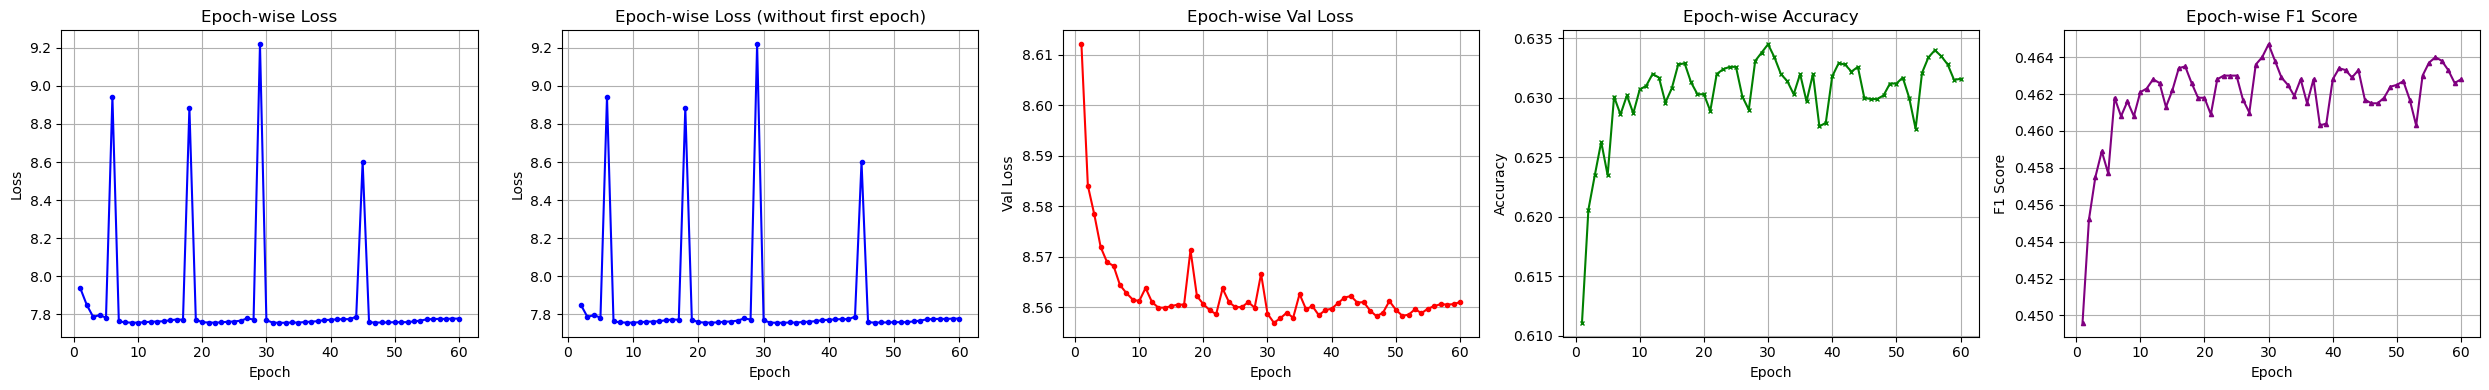

In [3]:
import re
import matplotlib.pyplot as plt

if eval_protocol == "vq":
    # Step 行正则匹配
    step_pattern = re.compile(
        r"Step\s+(\d+)\s+\|"
        r"\s+vq_loss:\s+([0-9.]+)\s+\|"
        r"\s+orthogonal_reg_loss:\s+([0-9.]+)\s+\|"
        r"\s+commit_loss:\s+([0-9.]+)\s+\|"
        r"\s+codebook_loss:\s+([0-9.]+)\s+\|"
        r"\s+num_codes:\s+([0-9.]+)\s+\|"
        r"\s+edge_rec_loss:\s+([0-9.]+)\s+\|"
        r"\s+feature_rec_loss:\s+([0-9.]+)\s+\|"
        r"\s+total:\s+([0-9.]+)"
    )


    # Epoch 行正则匹配
    epoch_pattern = re.compile(
        r"Ep\s+(\d+)\s+\|\s+loss:\s+([0-9.]+)\s+\|\s+val loss:\s+([0-9.]+)\s+\|\s+acc:\s+([0-9.]+)\s+\|\s+f1:\s+([0-9.]+)"
    )

    # 存储 step 数据
    steps = []
    vq_losses = []
    orthogonal_reg_losses = []
    commit_losses = []
    codebook_losses = []
    num_codes_list = []
    edge_rec_losses = []
    feature_rec_losses = []
    total_losses = []

    # 存储 epoch 数据
    epochs, epoch_loss, epoch_valloss, epoch_acc, epoch_f1 = [], [], [], [], []

    # 读取 log 并提取数据
    with open(log_path, "r") as f:
        for line in f:       
            # 匹配 Step 行
            step_match = step_pattern.search(line)
            if step_match:
                (
                    step, vq_loss, orthogonal_reg_loss, commit_loss,
                    codebook_loss, num_codes, edge_rec_loss,
                    feature_rec_loss, total
                ) = step_match.groups()

                # 添加到对应的列表
                steps.append(int(step))
                vq_losses.append(float(vq_loss))
                orthogonal_reg_losses.append(float(orthogonal_reg_loss))
                commit_losses.append(float(commit_loss))
                codebook_losses.append(float(codebook_loss))
                num_codes_list.append(float(num_codes))
                edge_rec_losses.append(float(edge_rec_loss))
                feature_rec_losses.append(float(feature_rec_loss))
                total_losses.append(float(total))

            # 匹配 Epoch 行
            epoch_match = epoch_pattern.search(line)
            if epoch_match:
                epochs.append(int(epoch_match.group(1)))
                epoch_loss.append(float(epoch_match.group(2)))
                epoch_valloss.append(float(epoch_match.group(3)))
                epoch_acc.append(float(epoch_match.group(4)))
                epoch_f1.append(float(epoch_match.group(5)))

    steps = [i for i in range(10, 10*len(total_losses)+1, 10)]
    # ======================
    # Step-wise 5个指标曲线图
    # ======================
    fig, axs = plt.subplots(1, 5, figsize=(25, 4), sharex=False)

    axs[1].plot(steps, vq_losses, label="vq_loss", color='blue')
    axs[1].set_ylabel("Loss")
    axs[1].set_title("Step-wise vq_loss")

    # axs[1].plot(steps, orthogonal_reg_losses, label="orthogonal_reg_loss", color='orange')
    # axs[1].set_ylabel("Loss")
    # axs[1].set_title("Step-wise orthogonal_reg_loss")

    # axs[2].plot(steps, commit_losses, label="commit_loss", color='green')
    # axs[2].set_ylabel("Loss")
    # axs[2].set_title("Step-wise commit_loss")

    axs[2].plot(steps, codebook_losses, label="codebook_loss", color='red')
    axs[2].set_ylabel("Loss")
    axs[2].set_title("Step-wise codebook_loss")

    axs[3].plot(steps, total_losses, label="total_loss", color='purple')
    axs[3].set_ylabel("Loss")
    axs[3].set_title("Step-wise total_loss")

    axs[4].plot(steps, num_codes_list, label="num_codes", color='brown')
    axs[4].set_ylabel("Number of Codes")
    axs[4].set_title("Step-wise num_codes")

    axs[0].plot(steps, edge_rec_losses, label="edge_rec_loss", color='pink')
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Step-wise edge_rec_loss")

    # 添加网格线，美化图表
    for ax in axs:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

    # ======================
    # Epoch-wise Loss 和 Accuracy
    # ======================
    if epochs:
        fig, axs = plt.subplots(1, 5, figsize=(25, 4))  # 一行N列子图

        axs[0].plot(epochs, epoch_loss, label="Epoch Loss", marker='o', markersize=3, color='blue')
        axs[0].set_title("Epoch-wise Loss")
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Loss")
        axs[0].grid(True)

        axs[1].plot(epochs[1:], epoch_loss[1:], label="Epoch Loss without first epoch", marker='o', markersize=3, color='blue')
        axs[1].set_title("Epoch-wise Loss (without first epoch)")
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("Loss")
        axs[1].grid(True)

        axs[2].plot(epochs, epoch_valloss, label="Epoch Val Loss", marker='o', markersize=3, color='red')
        axs[2].set_title("Epoch-wise Val Loss")
        axs[2].set_xlabel("Epoch")
        axs[2].set_ylabel("Val Loss")
        axs[2].grid(True)

        axs[3].plot(epochs, epoch_acc, label="Epoch Acc", marker='x', markersize=3, color='green')
        axs[3].set_title("Epoch-wise Accuracy")
        axs[3].set_xlabel("Epoch")
        axs[3].set_ylabel("Accuracy")
        axs[3].grid(True)

        axs[4].plot(epochs, epoch_f1, label="Epoch F1", marker='^', markersize=3, color='purple')
        axs[4].set_title("Epoch-wise F1 Score")
        axs[4].set_xlabel("Epoch")
        axs[4].set_ylabel("F1 Score")
        axs[4].grid(True)

        plt.tight_layout()
        plt.show()



In [4]:
import pickle

with open(score_path, 'rb') as f:
    loss_and_score = pickle.load(f)

In [5]:
len(loss_and_score),len(loss_and_score[0][0]),len(loss_and_score[0][1]),len(loss_and_score[0][2])

(60, 5397, 5397, 5399)

In [6]:
loss_and_score[0][0][0],
# loss_and_score[0][1][0],loss_and_score[0][2][0]

({'accuracy': 0.6195652173913043,
  'precision': 0.30201342281879195,
  'recall': 0.9782608695652174,
  'f1': 0.46153846153846156,
  'idx': tensor(0),
  'adj_pred': tensor([0.7633, 0.5394, 0.3268, 0.3788, 0.3950, 0.7613, 0.7092, 0.7633, 0.3367,
          0.6079, 0.6719, 0.3543, 0.7227, 0.3135, 0.4270, 0.4351, 0.6931, 0.4878,
          0.6416, 0.4351, 0.3643, 0.0848, 0.9934, 0.5394, 0.3268, 0.3788, 0.3950,
          0.7613, 0.7092, 0.7633, 0.3367, 0.6079, 0.6719, 0.3543, 0.7227, 0.3135,
          0.4270, 0.4351, 0.6931, 0.4878, 0.6416, 0.4351, 0.3643, 0.0848, 0.9934,
          0.2646, 0.2963, 0.3054, 0.5414, 0.4963, 0.5394, 0.2711, 0.4242, 0.8286,
          0.2810, 0.5068, 0.2580, 0.3241, 0.3310, 0.8122, 0.5102, 0.5467, 0.3310,
          0.2868, 1.0000, 0.9989, 0.6325, 0.6317, 0.3181, 0.4067, 0.3268, 0.6408,
          0.5248, 0.2934, 0.6796, 0.3884, 0.6777, 0.5515, 0.5200, 0.2823, 0.4520,
          0.3562, 0.5200, 0.6260, 0.1206, 0.9965, 0.6138, 0.3904, 0.3849, 0.3788,
          0.6921,

acc_for_graphs[epoch]
precision_for_graphs[epoch]
recall_for_graphs[epoch]
f1_for_graphs[epoch]
它们都是同一个长度（图的数量），而且每个图的位置（index）是相同的！

Plotting for 1 : train, length = 5397


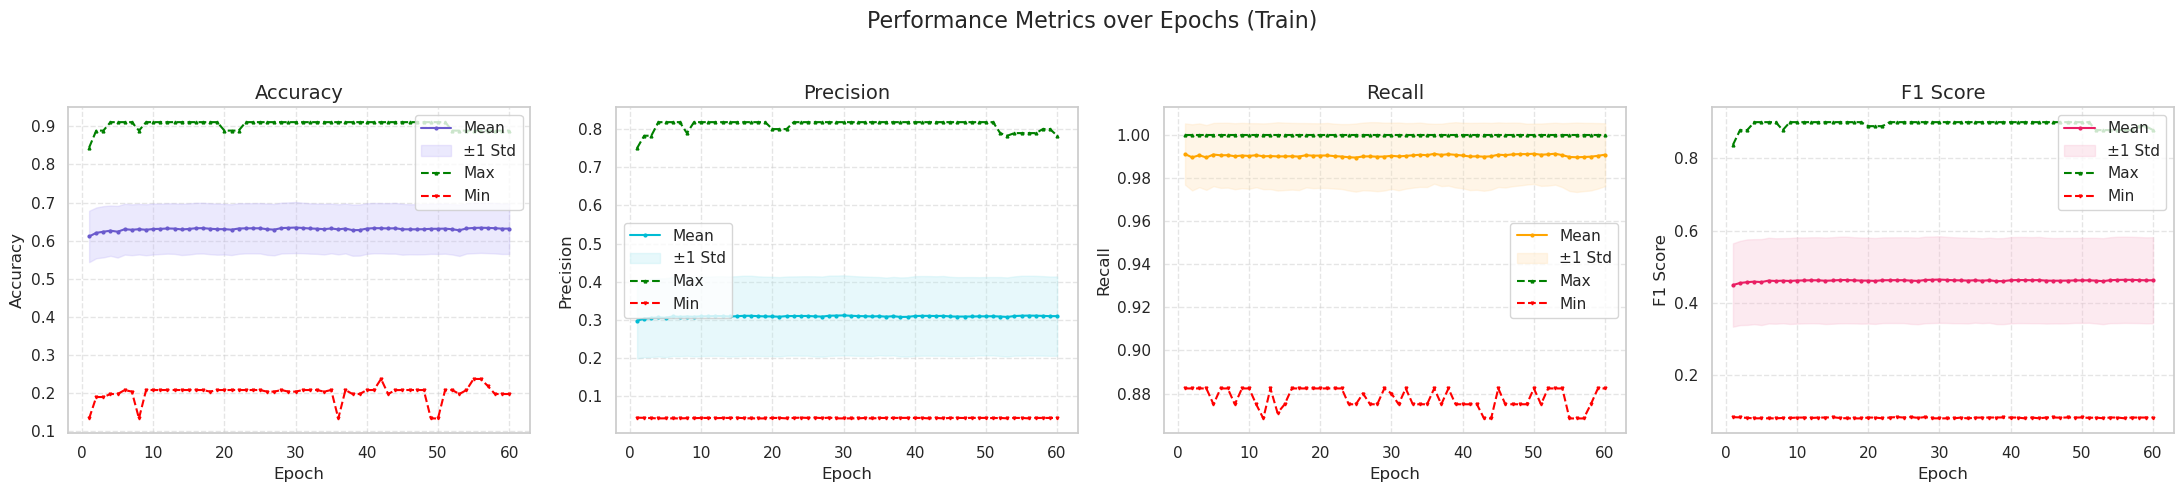

Plotting for 2 : val, length = 5397


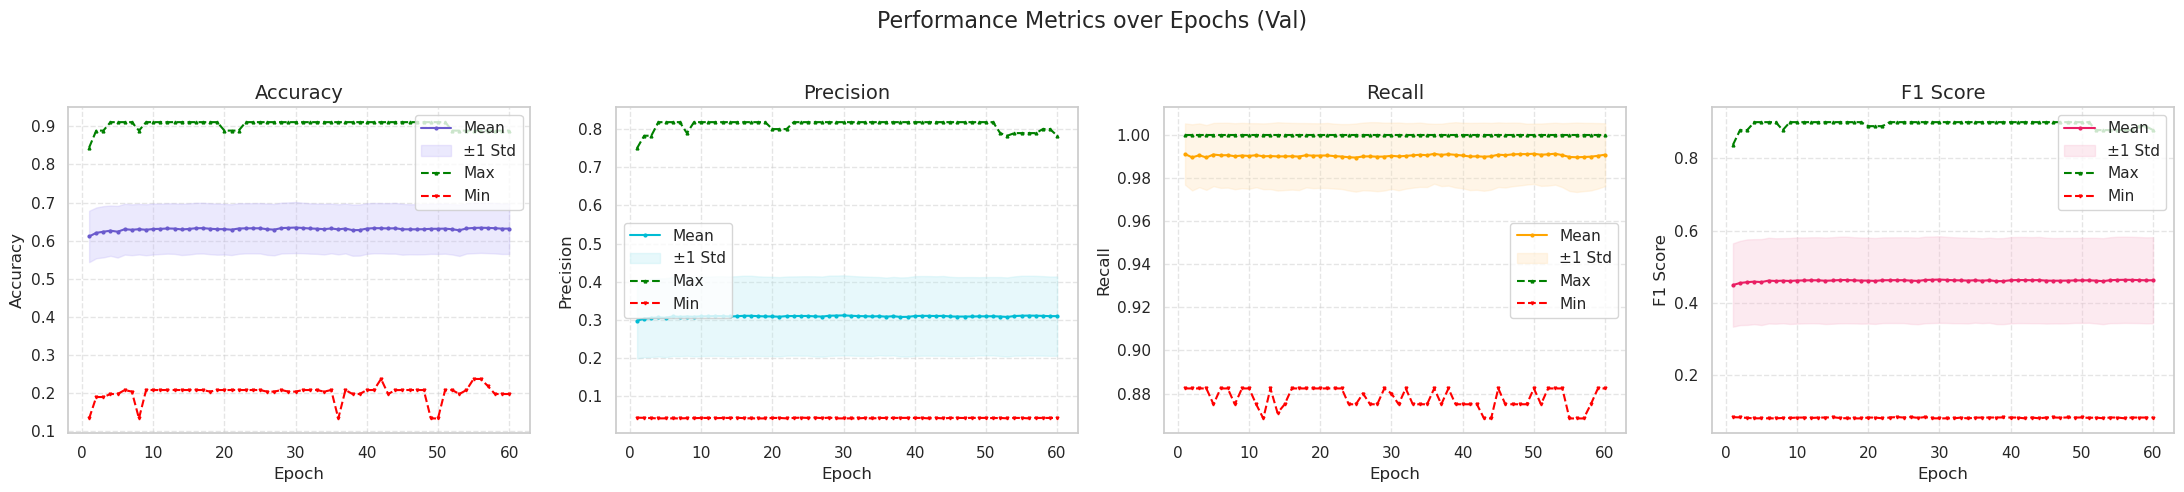

Plotting for 3 : test, length = 5399


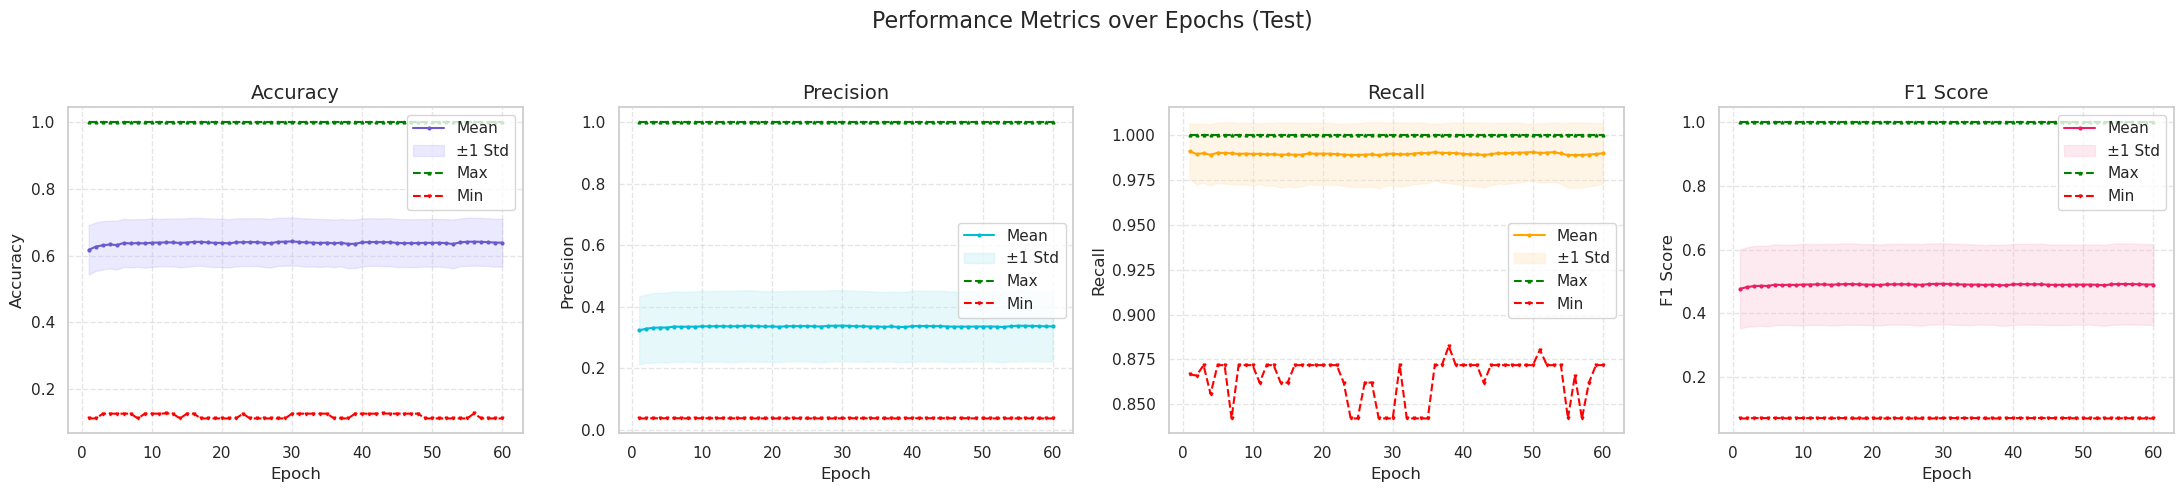

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# colors for mean/std and max/min
colors = {
    "Accuracy": ("#6a5acd", "#c0b7f9"),     # 柔和紫色调
    "Precision": ("#00bcd4", "#b2ebf2"),     # 清爽蓝绿色调
    "Recall": ("#ffa500", "#ffe0b2"),        # 温暖橘黄色调
    "F1 Score": ("#e91e63", "#f8bbd0"),      # 清新粉色调 🌸
}



for plot_for in [1, 2, 3]:
    print(f"Plotting for {plot_for} : {['train', 'val', 'test'][plot_for-1]}, length = {len(loss_and_score[0][plot_for-1])}")

    acc_for_graphs = {}
    precision_for_graphs = {}
    recall_for_graphs = {}
    f1_for_graphs = {}

    for i in range(len(loss_and_score)):
        epoch = i+1
        this_epoch = loss_and_score[i][plot_for-1]
        acc_for_graphs[epoch] = [r['accuracy'] for r in this_epoch]
        precision_for_graphs[epoch] = [r['precision'] for r in this_epoch]
        recall_for_graphs[epoch] = [r['recall'] for r in this_epoch]
        f1_for_graphs[epoch] = [r['f1'] for r in this_epoch]

    metrics_dict = {
        "Accuracy": acc_for_graphs,
        "Precision": precision_for_graphs,
        "Recall": recall_for_graphs,
        "F1 Score": f1_for_graphs,
    }

    sns.set(style="whitegrid")
    fig, axs = plt.subplots(1, 4, figsize=(22, 5))

    for idx, (metric_name, epoch_values) in enumerate(metrics_dict.items()):
        epochs = sorted(epoch_values.keys())
        means = [np.mean(epoch_values[ep]) for ep in epochs]
        stds  = [np.std(epoch_values[ep]) for ep in epochs]
        maxs  = [np.max(epoch_values[ep]) for ep in epochs]
        mins  = [np.min(epoch_values[ep]) for ep in epochs]

        mean_color, fill_color = colors[metric_name]

        ax = axs[idx]
        ax.plot(epochs, means, marker='o', label="Mean", color=mean_color, markersize=2)
        ax.fill_between(epochs, np.array(means)-np.array(stds), np.array(means)+np.array(stds), 
                        color=fill_color, alpha=0.3, label="±1 Std")
        ax.plot(epochs, maxs, label="Max", color="green", linestyle="--", marker='^', markersize=2)
        ax.plot(epochs, mins, label="Min", color="red", linestyle="--", marker='v', markersize=2)

        ax.set_title(f"{metric_name}", fontsize=14)
        ax.set_xlabel("Epoch", fontsize=12)
        ax.set_ylabel(metric_name, fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.legend()

    plt.suptitle(f"Performance Metrics over Epochs ({['Train', 'Val', 'Test'][plot_for-1]})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


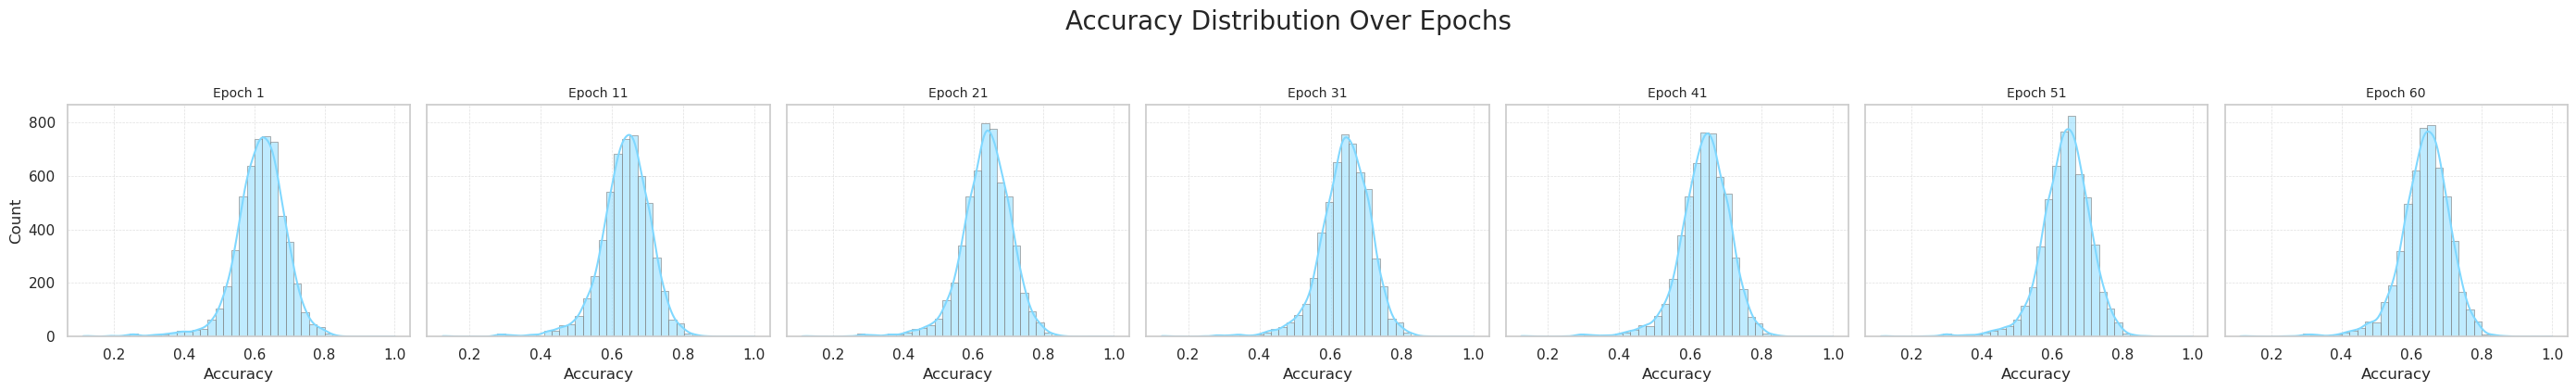

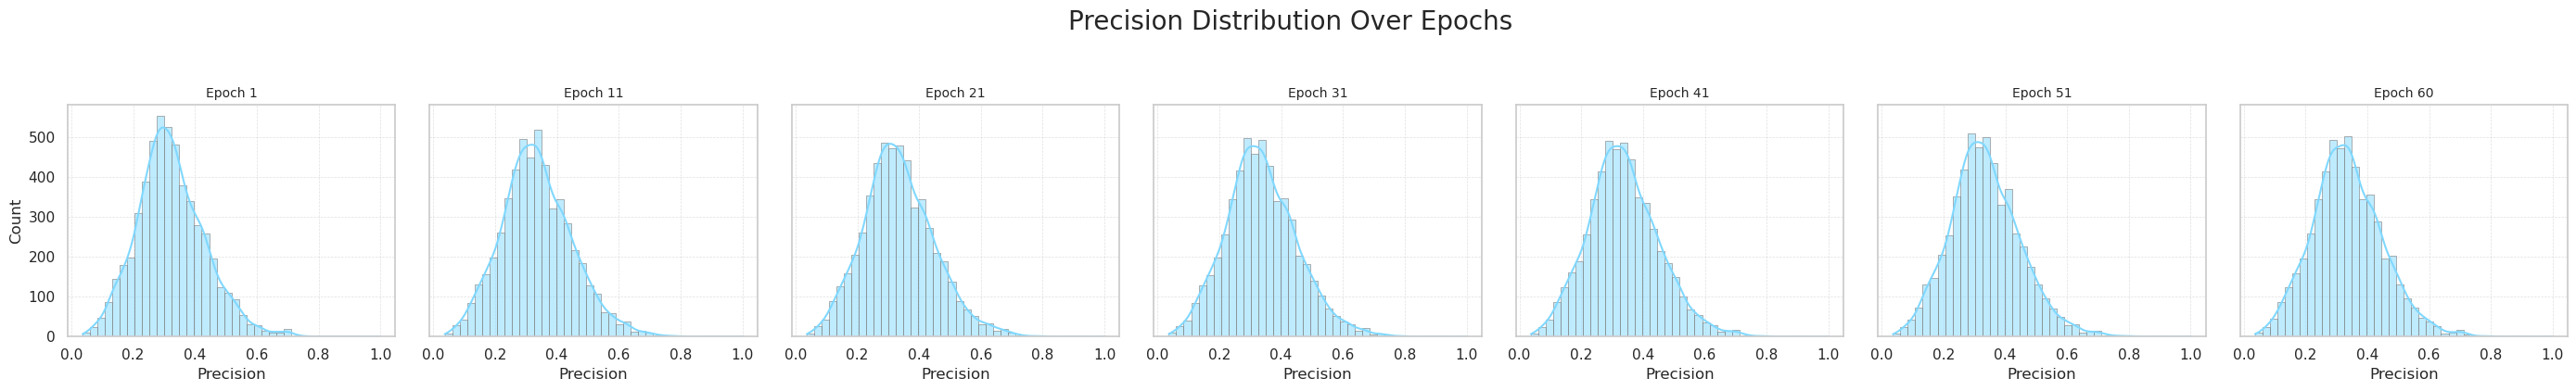

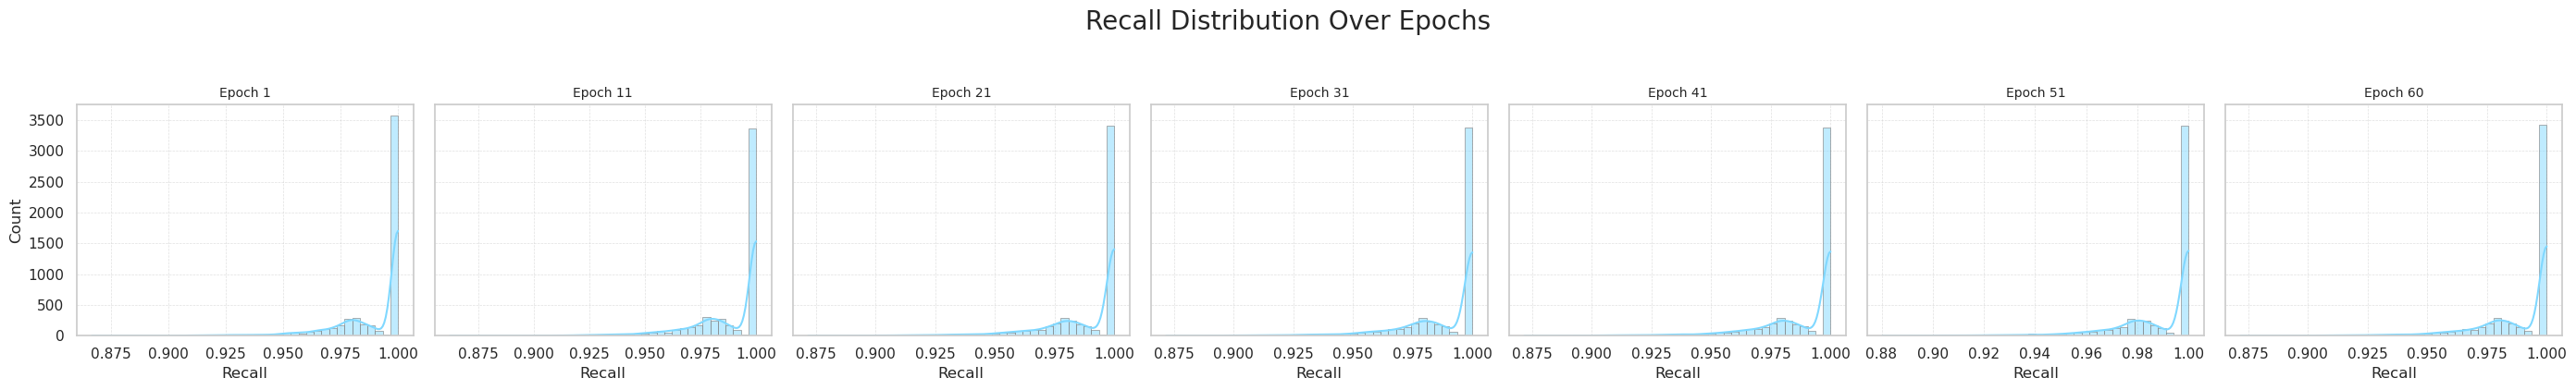

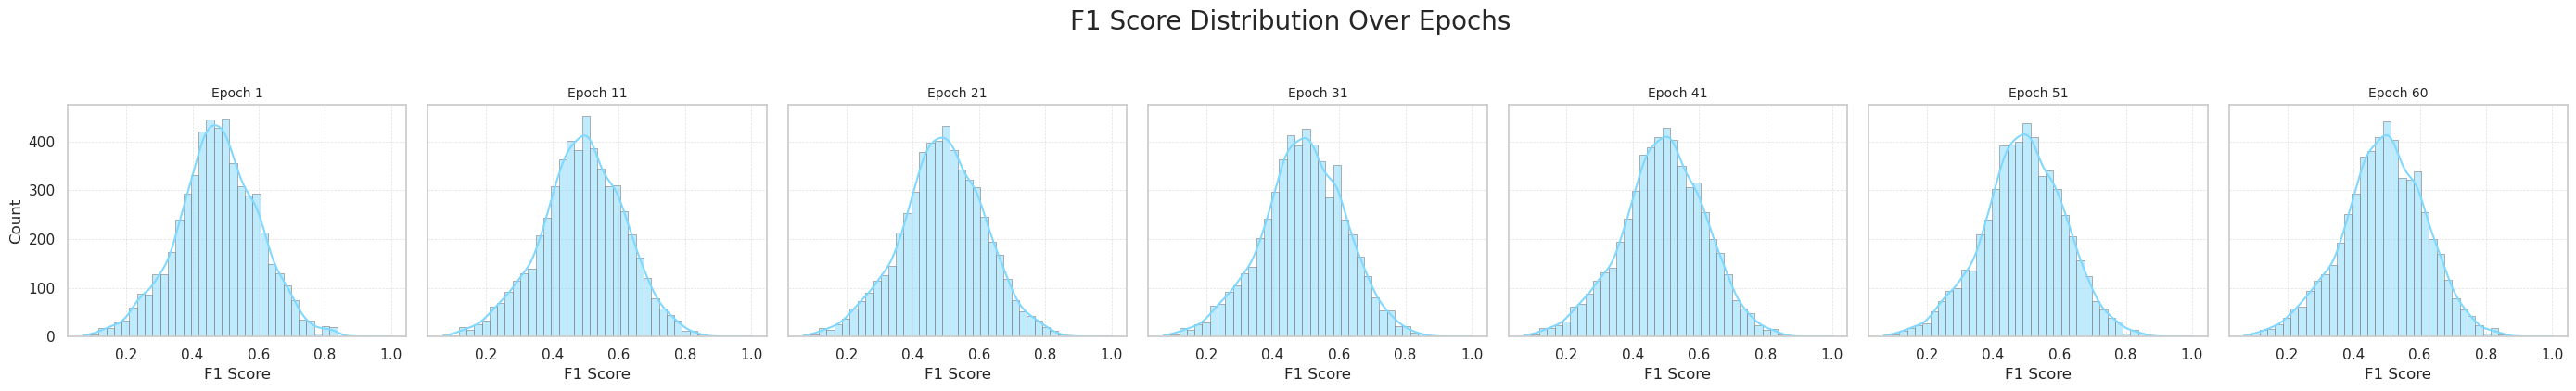

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_metric_histograms(metrics_dict, bins=40):
    sns.set(style="whitegrid", font_scale=1.0)

    for metric_name, epoch_values in metrics_dict.items():
        # 筛选代表性 epoch（每隔10个 + 最后一个）
        selected_epochs = sorted(epoch_values.keys())
        sampled_epochs = [e for i, e in enumerate(selected_epochs) if i % 10 == 0]
        if selected_epochs[-1] not in sampled_epochs:
            sampled_epochs.append(selected_epochs[-1])
        
        num_plots = len(sampled_epochs)
        fig, axs = plt.subplots(1, num_plots, figsize=(4 * num_plots, 4), sharey=True)

        if num_plots == 1:
            axs = [axs]

        for ax, epoch in zip(axs, sampled_epochs):
            sns.histplot(epoch_values[epoch], bins=bins, kde=True, ax=ax, color="#80d8ff", edgecolor='gray')
            ax.set_title(f"Epoch {epoch}", fontsize=10)
            ax.set_xlabel(metric_name)
            ax.set_ylabel("Count")
            ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

        fig.suptitle(f"{metric_name} Distribution Over Epochs", fontsize=20, y=1.05)
        plt.tight_layout()
        plt.show()
plot_metric_histograms({
    "Accuracy": acc_for_graphs,
    "Precision": precision_for_graphs,
    "Recall": recall_for_graphs,
    "F1 Score": f1_for_graphs,
})


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def summarize_and_plot_metrics(metric_list):
    """
    输入是一个由 metric dict 构成的列表：
    [{'accuracy': ..., 'precision': ..., 'recall': ..., 'f1': ...}, ...]

    输出每个指标的均值、方差、最小值、最大值，并进行可视化。
    """
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    stats = {m: {} for m in metrics}
    values = {m: [] for m in metrics}

    # 收集每个指标的值
    for entry in metric_list:
        for m in metrics:
            values[m].append(entry[m])

    # 计算统计量
    for m in metrics:
        arr = np.array(values[m])
        stats[m]['mean'] = np.mean(arr)
        stats[m]['std'] = np.std(arr)
        stats[m]['min'] = np.min(arr)
        stats[m]['max'] = np.max(arr)

    # 打印
    print("\n📊 Metric Summary:")
    for m in metrics:
        print(f"{m.capitalize():<10} | Mean: {stats[m]['mean']:.4f} | Std: {stats[m]['std']:.4f} | "
              f"Min: {stats[m]['min']:.4f} | Max: {stats[m]['max']:.4f}")

    # 可视化
    plt.figure(figsize=(10, 4))
    for i, m in enumerate(metrics):
        plt.subplot(1, 4, i + 1)
        plt.hist(values[m], bins=50, color='skyblue', edgecolor='black')
        plt.title(m.capitalize())
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.grid(True)

    plt.suptitle("Metric Distribution Across Graphs")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    return stats



Best epoch metrics: f1, best epoch 56.
10796 vs 5397 , 5397 vs 5399
For train: 

📊 Metric Summary:
Accuracy   | Mean: 0.6340 | Std: 0.0660 | Min: 0.2372 | Max: 0.8889
Precision  | Mean: 0.3114 | Std: 0.1044 | Min: 0.0423 | Max: 0.7895
Recall     | Mean: 0.9897 | Std: 0.0161 | Min: 0.8684 | Max: 1.0000
F1         | Mean: 0.4640 | Std: 0.1191 | Min: 0.0811 | Max: 0.8780


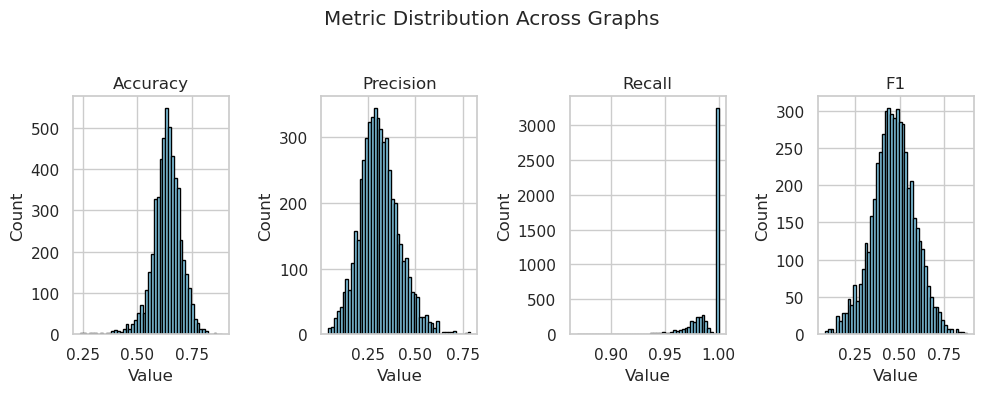

For validation:

📊 Metric Summary:
Accuracy   | Mean: 0.6340 | Std: 0.0660 | Min: 0.2372 | Max: 0.8889
Precision  | Mean: 0.3114 | Std: 0.1044 | Min: 0.0423 | Max: 0.7895
Recall     | Mean: 0.9897 | Std: 0.0161 | Min: 0.8684 | Max: 1.0000
F1         | Mean: 0.4640 | Std: 0.1191 | Min: 0.0811 | Max: 0.8780


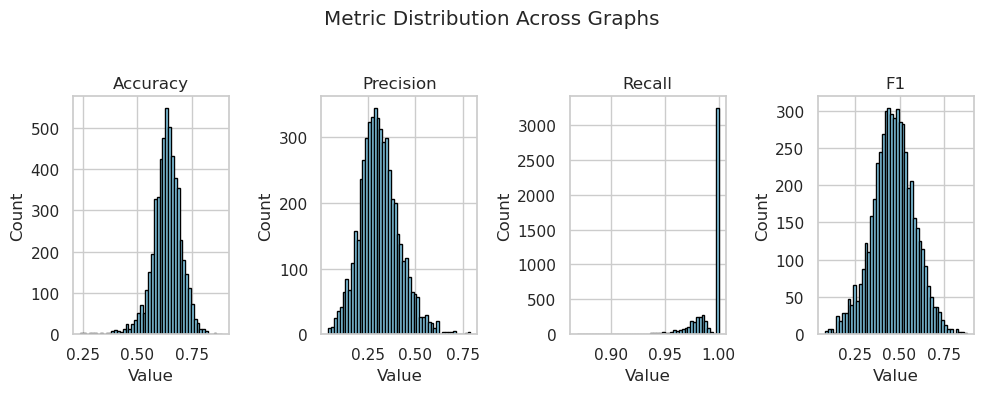

For test:

📊 Metric Summary:
Accuracy   | Mean: 0.6417 | Std: 0.0715 | Min: 0.1271 | Max: 1.0000
Precision  | Mean: 0.3375 | Std: 0.1151 | Min: 0.0368 | Max: 1.0000
Recall     | Mean: 0.9889 | Std: 0.0182 | Min: 0.8660 | Max: 1.0000
F1         | Mean: 0.4919 | Std: 0.1271 | Min: 0.0709 | Max: 1.0000


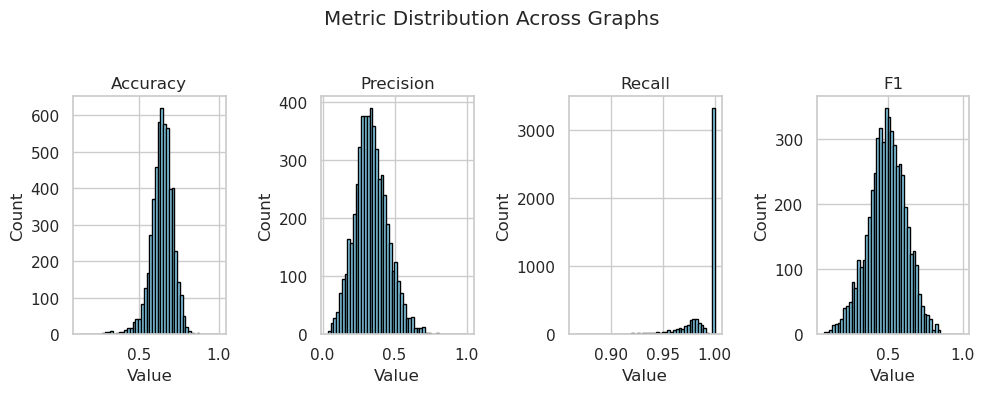

Best epoch metrics: acc, best epoch 30.
10796 vs 5397 , 5397 vs 5399
For train: 

📊 Metric Summary:
Accuracy   | Mean: 0.6345 | Std: 0.0671 | Min: 0.2039 | Max: 0.9111
Precision  | Mean: 0.3120 | Std: 0.1050 | Min: 0.0422 | Max: 0.8182
Recall     | Mean: 0.9904 | Std: 0.0154 | Min: 0.8800 | Max: 1.0000
F1         | Mean: 0.4647 | Std: 0.1198 | Min: 0.0809 | Max: 0.9000


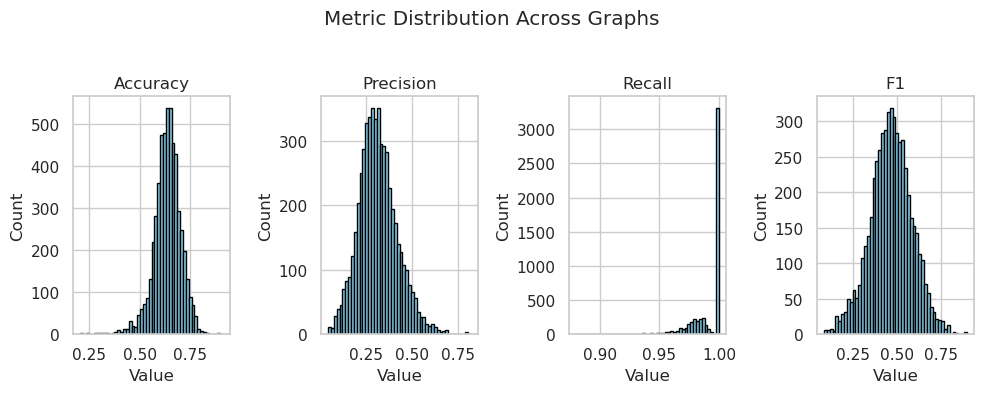

For validation:

📊 Metric Summary:
Accuracy   | Mean: 0.6345 | Std: 0.0671 | Min: 0.2039 | Max: 0.9111
Precision  | Mean: 0.3120 | Std: 0.1050 | Min: 0.0422 | Max: 0.8182
Recall     | Mean: 0.9904 | Std: 0.0154 | Min: 0.8800 | Max: 1.0000
F1         | Mean: 0.4647 | Std: 0.1198 | Min: 0.0809 | Max: 0.9000


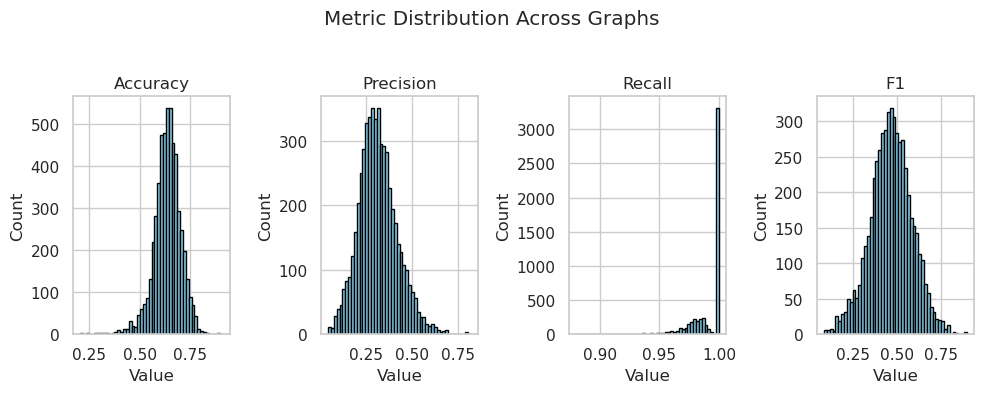

For test:

📊 Metric Summary:
Accuracy   | Mean: 0.6425 | Std: 0.0719 | Min: 0.1262 | Max: 1.0000
Precision  | Mean: 0.3382 | Std: 0.1155 | Min: 0.0368 | Max: 1.0000
Recall     | Mean: 0.9897 | Std: 0.0174 | Min: 0.8421 | Max: 1.0000
F1         | Mean: 0.4928 | Std: 0.1274 | Min: 0.0709 | Max: 1.0000


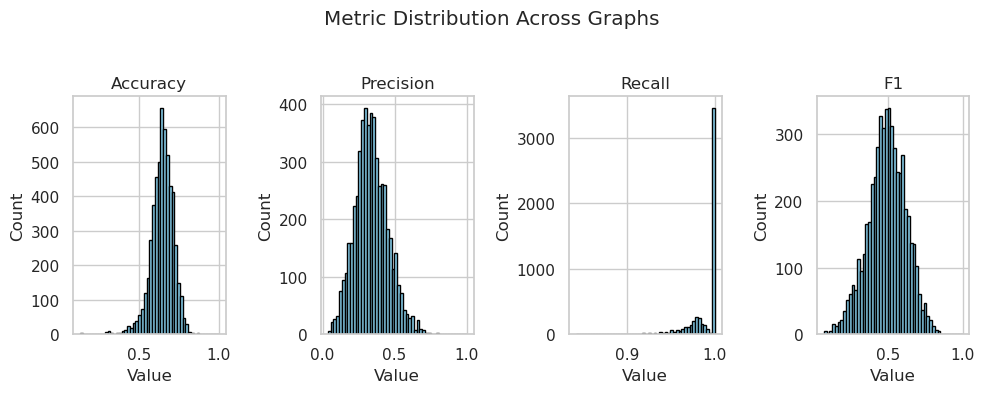

In [10]:
# 调用
best_choice = 'f1' # or 'acc'
for best_choice in ['f1', 'acc']:
    onepoch = [best_f1_epoch-1 if best_choice == 'f1' else best_acc_epoch-1][0]
    print(f"Best epoch metrics: {best_choice}, best epoch {onepoch+1}.")

    seen_res = loss_and_score[onepoch][0]
    val_res = loss_and_score[onepoch][1]
    test_res = loss_and_score[onepoch][2]

    unseen_res = val_res + test_res

    print(f"{len(unseen_res)} vs {len(seen_res)} , {len(val_res)} vs {len(test_res)}")

    # print(f"Unseen (including val and test): ")
    # stats = summarize_and_plot_metrics(unseen_res)
    print(f"For train: ")
    stats = summarize_and_plot_metrics(seen_res)

    print('For validation:')
    stats = summarize_and_plot_metrics(val_res)
    print('For test:')
    stats = summarize_and_plot_metrics(test_res)


In [13]:
train_res_at_best_acc = loss_and_score[best_acc_epoch-1][0]
val_res_at_best_acc = loss_and_score[best_acc_epoch-1][1]
test_res_at_best_acc = loss_and_score[best_acc_epoch-1][2]
train_res_at_best_f1 = loss_and_score[best_f1_epoch-1][0]
val_res_at_best_f1 = loss_and_score[best_f1_epoch-1][1]
test_res_at_best_f1 = loss_and_score[best_f1_epoch-1][2]

complete_res = test_res_at_best_acc
complete_res[0]

{'accuracy': 0.6402116402116402,
 'precision': 0.2879581151832461,
 'recall': 1.0,
 'f1': 0.44715447154471544,
 'idx': tensor(0),
 'adj_pred': tensor([0.5540, 0.3776, 0.7052, 0.3272, 0.7289, 0.7690, 0.3462, 0.2800, 0.7053,
         0.7725, 0.4578, 0.4131, 0.3194, 0.5905, 0.6406, 0.7800, 0.7382, 0.5805,
         0.1274, 0.8321, 0.4757, 0.5258, 0.6448, 0.2762, 0.2665, 0.3062, 0.9963,
         0.3711, 0.7372, 0.7397, 0.7276, 0.5540, 0.3413, 0.5729, 0.3391, 0.7068,
         0.2132, 0.2851, 0.3715, 0.2513, 0.2807, 0.5250, 0.3891, 0.4929, 0.1546,
         0.6172, 0.2074, 0.7062, 0.6501, 0.7688, 0.4673, 0.3861, 0.9948, 0.3326,
         0.4719, 0.3274, 0.3776, 0.7023, 0.6062, 0.5487, 0.2795, 0.7245, 0.7079,
         0.6965, 0.6528, 0.6148, 0.2922, 0.5003, 0.3287, 0.1411, 0.2718, 0.7192,
         0.3367, 0.3011, 0.4635, 0.6685, 0.6965, 0.9956, 0.5515, 0.8112, 0.7052,
         0.2872, 0.3872, 0.5202, 0.8357, 0.2414, 0.2882, 0.2887, 0.3538, 0.4177,
         0.7142, 0.5858, 0.5281, 0.1380, 0.8216,

In [14]:
import torch
def get_top_bottom_k_metrics(results, k=20):
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    output = {}

    for metric in metrics:
        # 排序并获取 index
        sorted_results = sorted(enumerate(results), key=lambda x: x[1][metric])
        bottom_k = sorted_results[:k]
        top_k = sorted_results[-k:]

        # 保存为结构化输出
        output[metric] = {
            'top': [{
                'index': idx,
                'center': res['idx'].item() if isinstance(res['idx'], torch.Tensor) else res['idx'],
                metric: res[metric]
            } for idx, res in reversed(top_k)],  # 倒序使得 top 从大到小
            'bottom': [{
                'index': idx,
                'center': res['idx'].item() if isinstance(res['idx'], torch.Tensor) else res['idx'],
                metric: res[metric]
            } for idx, res in bottom_k]
        }

    return output

# 调用
top_bottom_k_metrics = get_top_bottom_k_metrics(complete_res, k=20)

In [15]:
top_bottom_k_metrics['recall']['top'][:3]

[{'index': 5398, 'center': 5398, 'recall': 1.0},
 {'index': 5397, 'center': 5397, 'recall': 1.0},
 {'index': 5395, 'center': 5395, 'recall': 1.0}]

In [16]:
from utils import load_data
graphs = load_data(dataset_name)
graph_test = graphs['test']

Loading and balancing all datasets...
Max train length across datasets: 32896


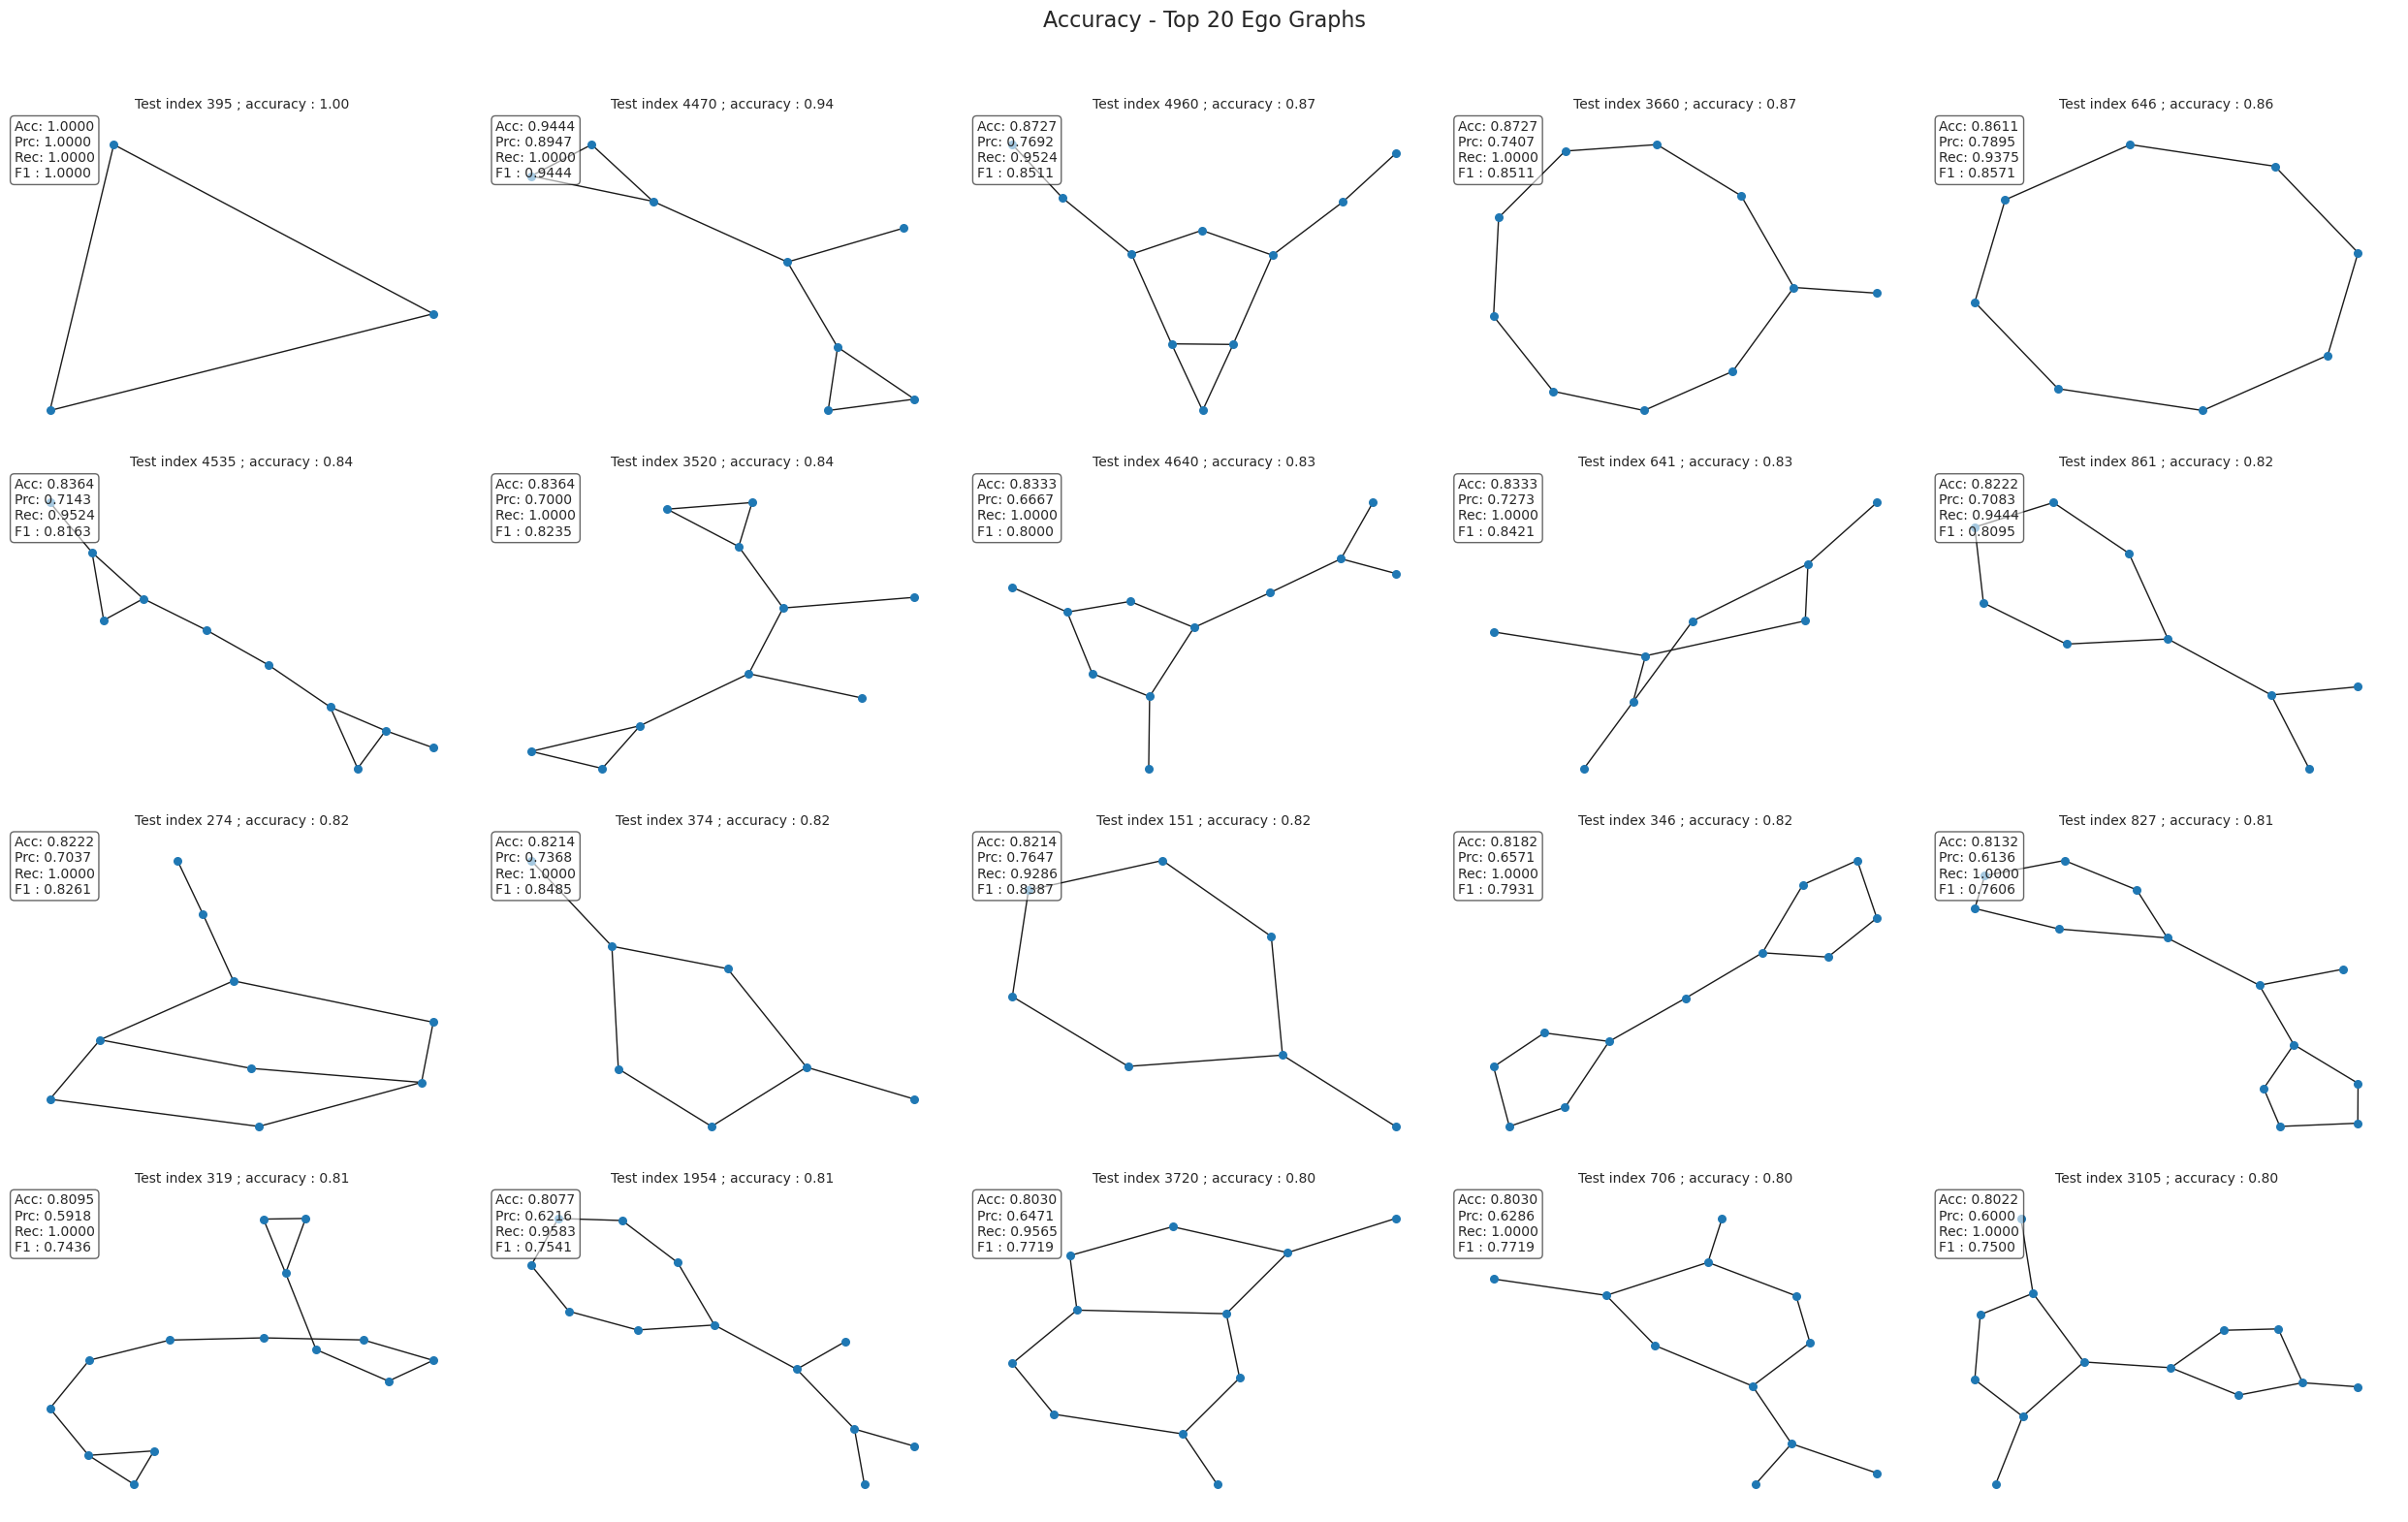

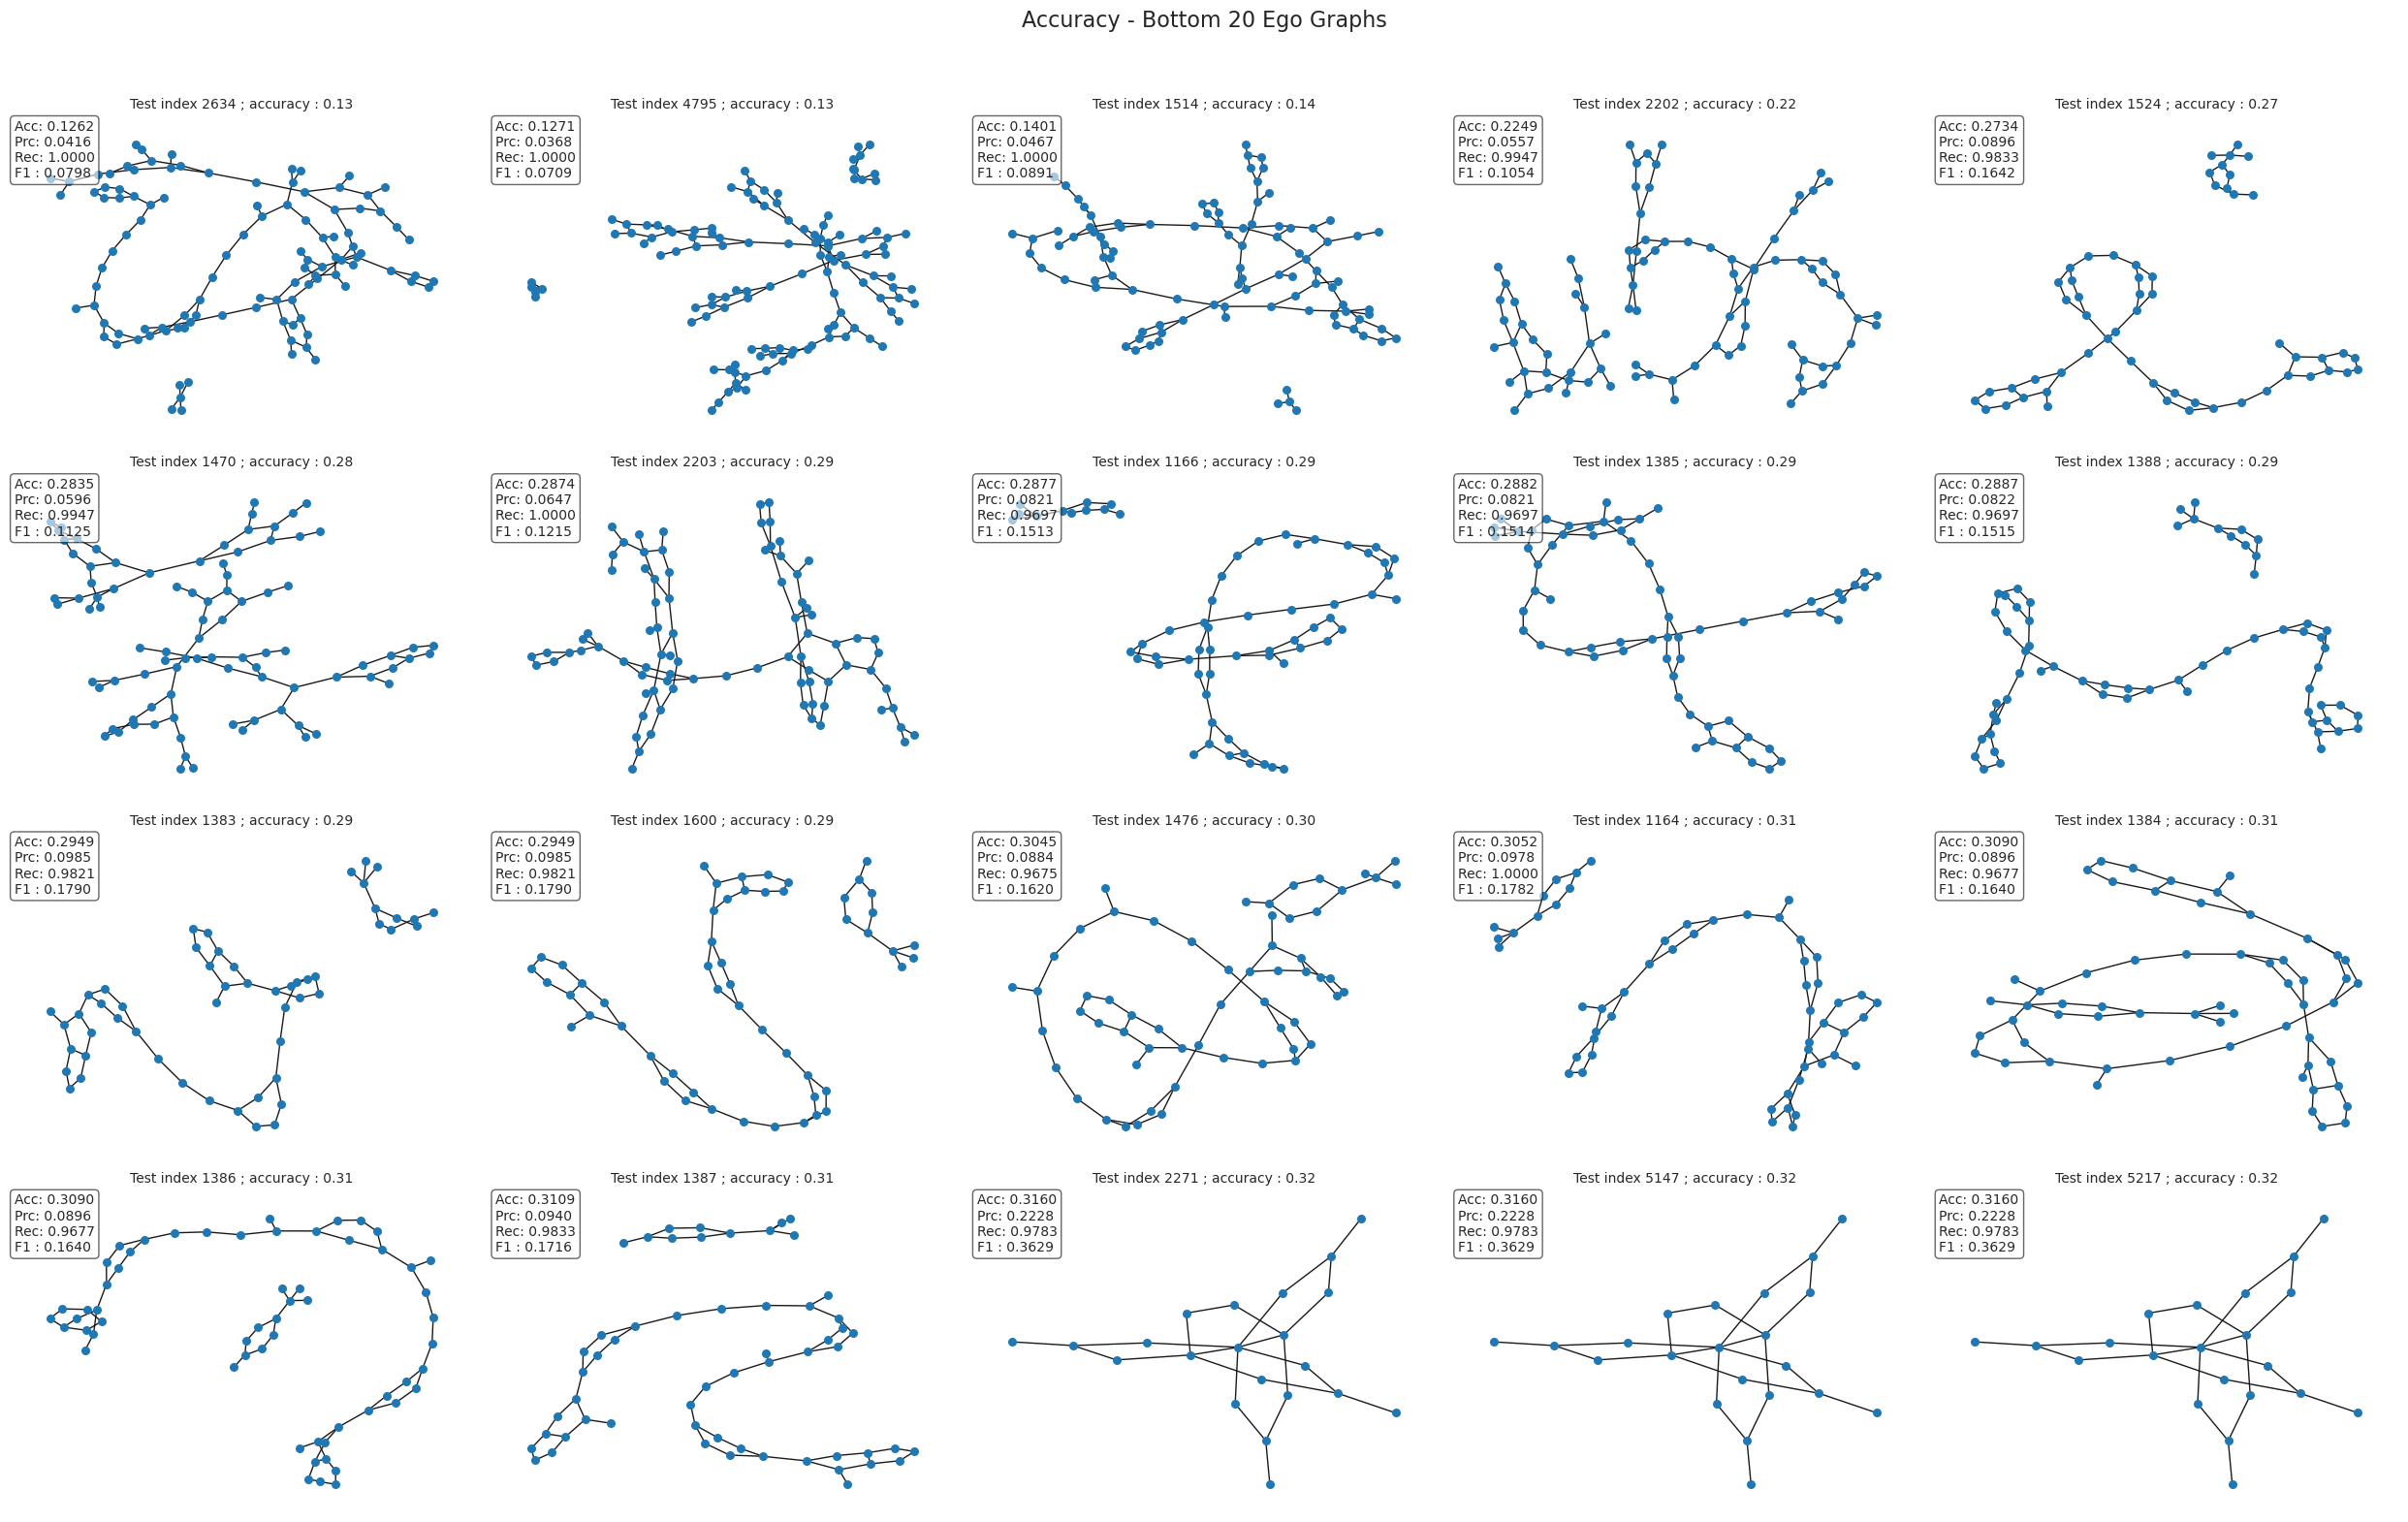

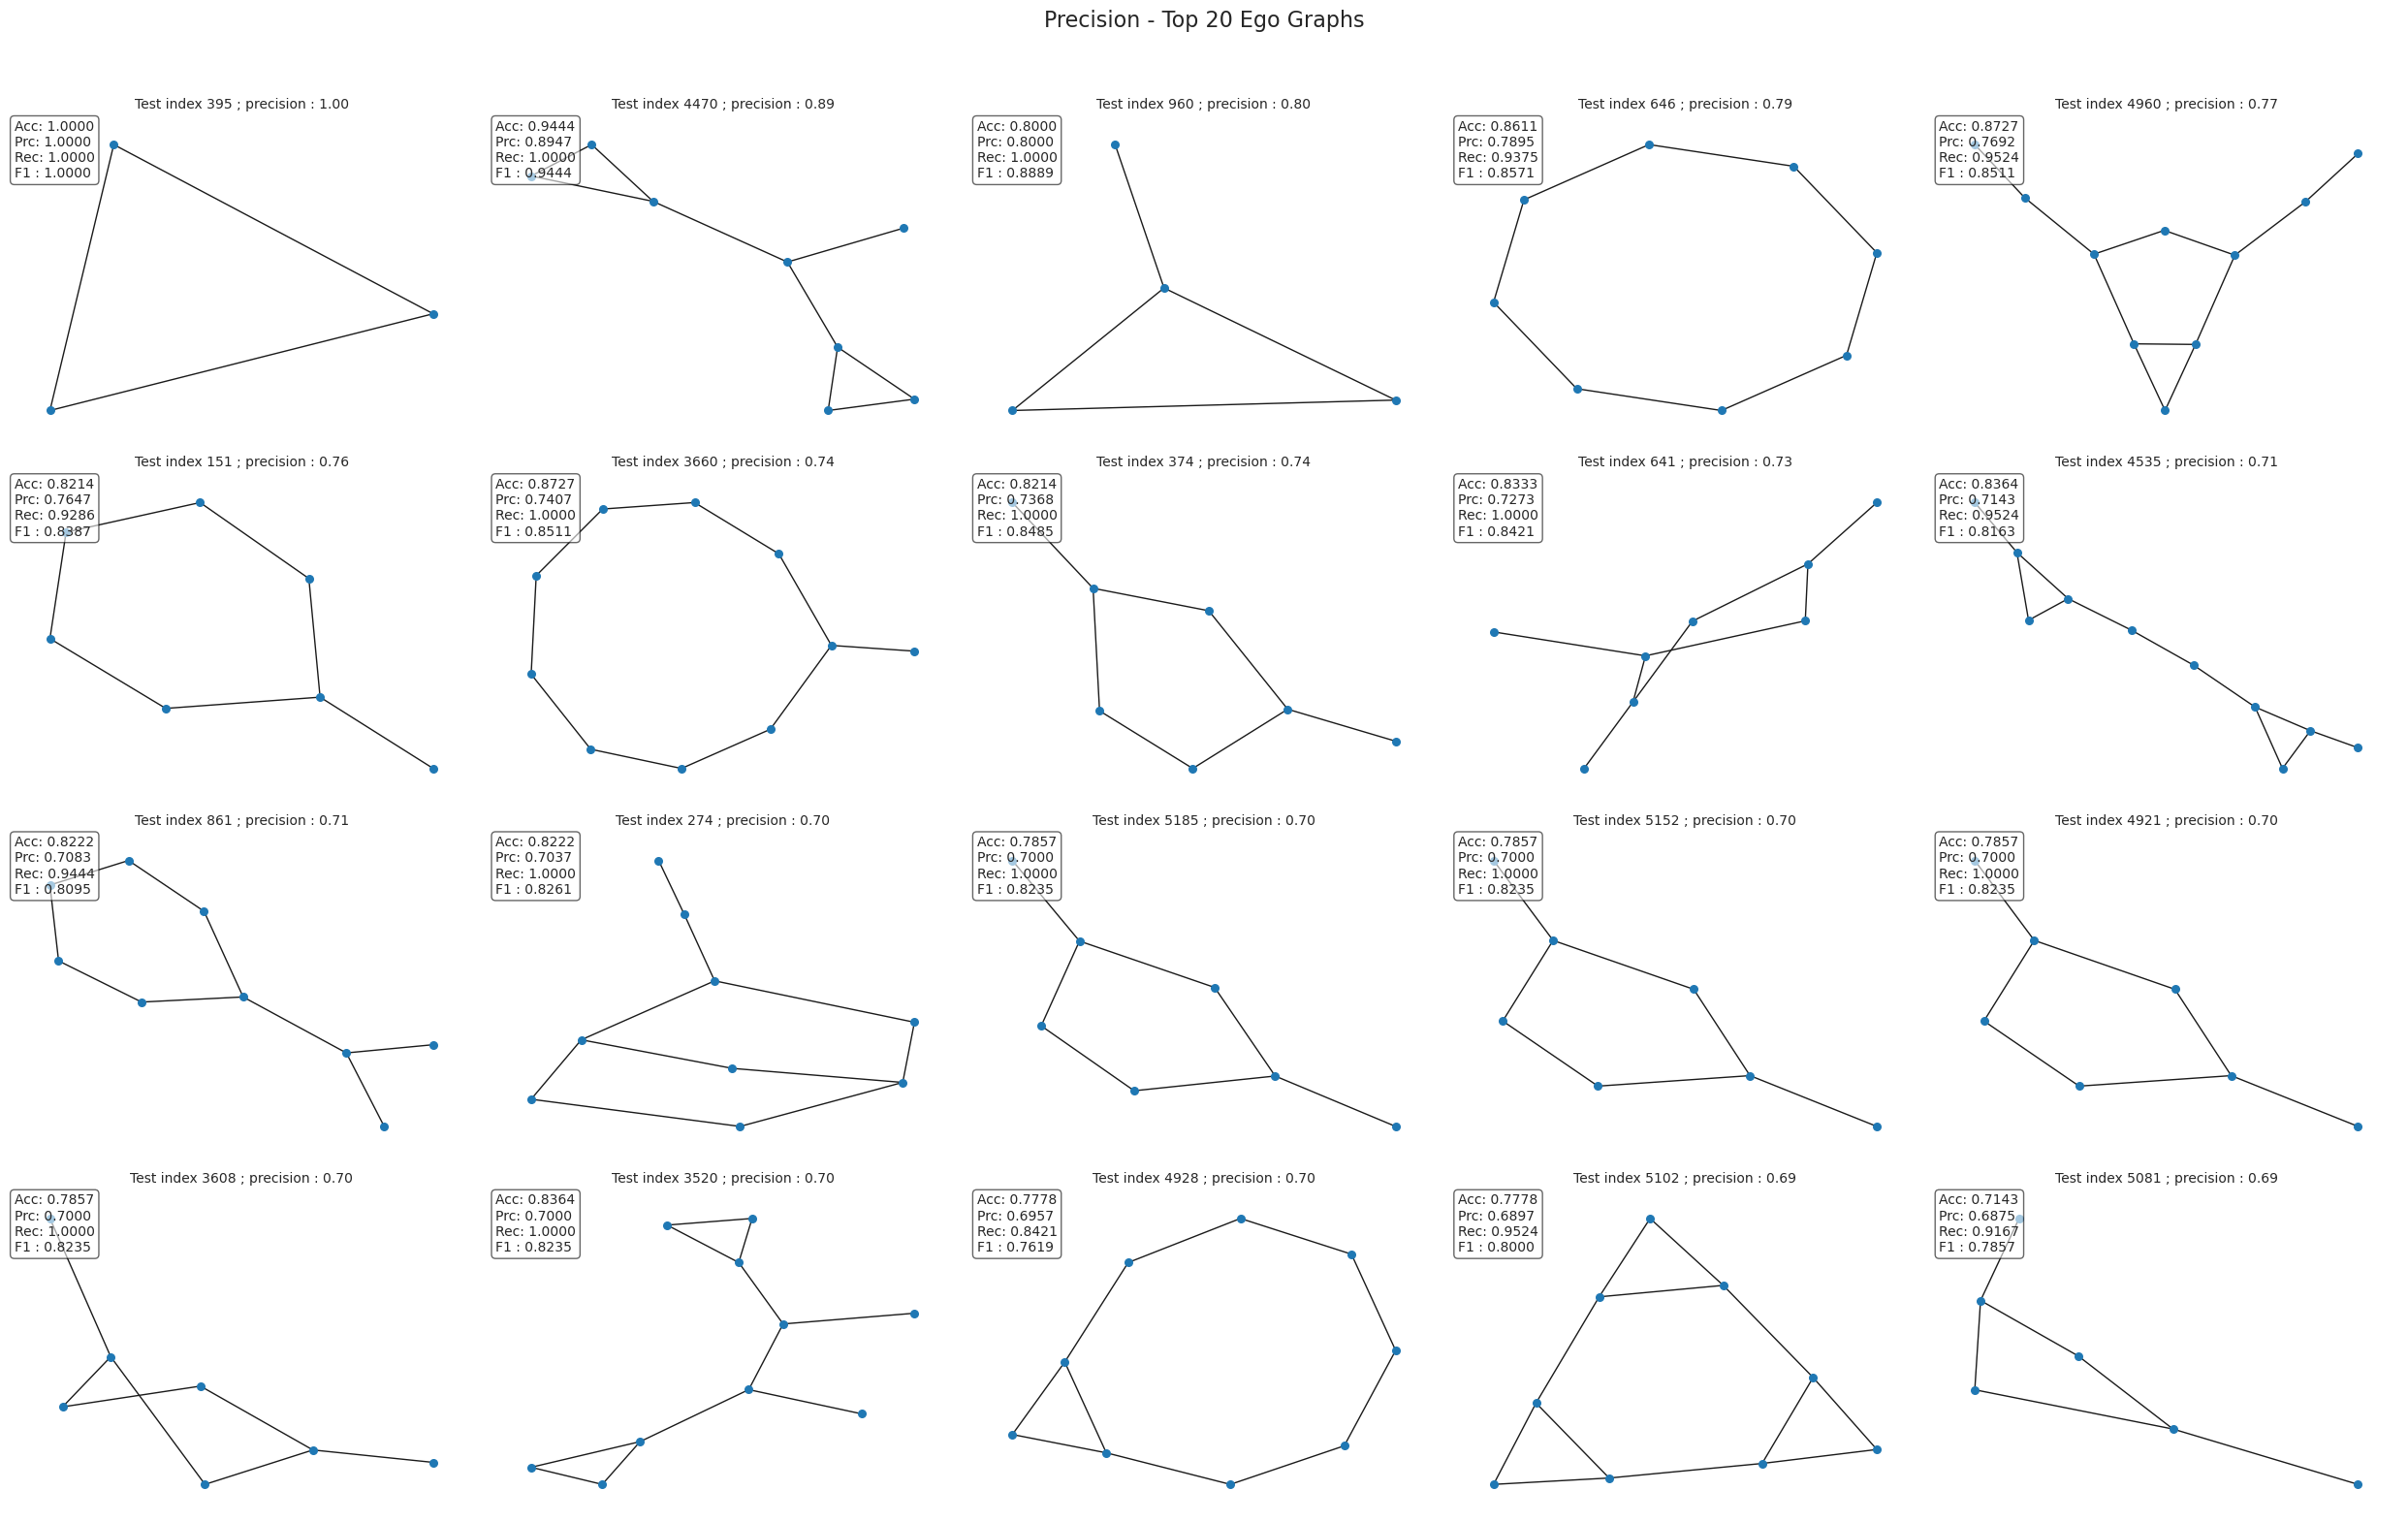

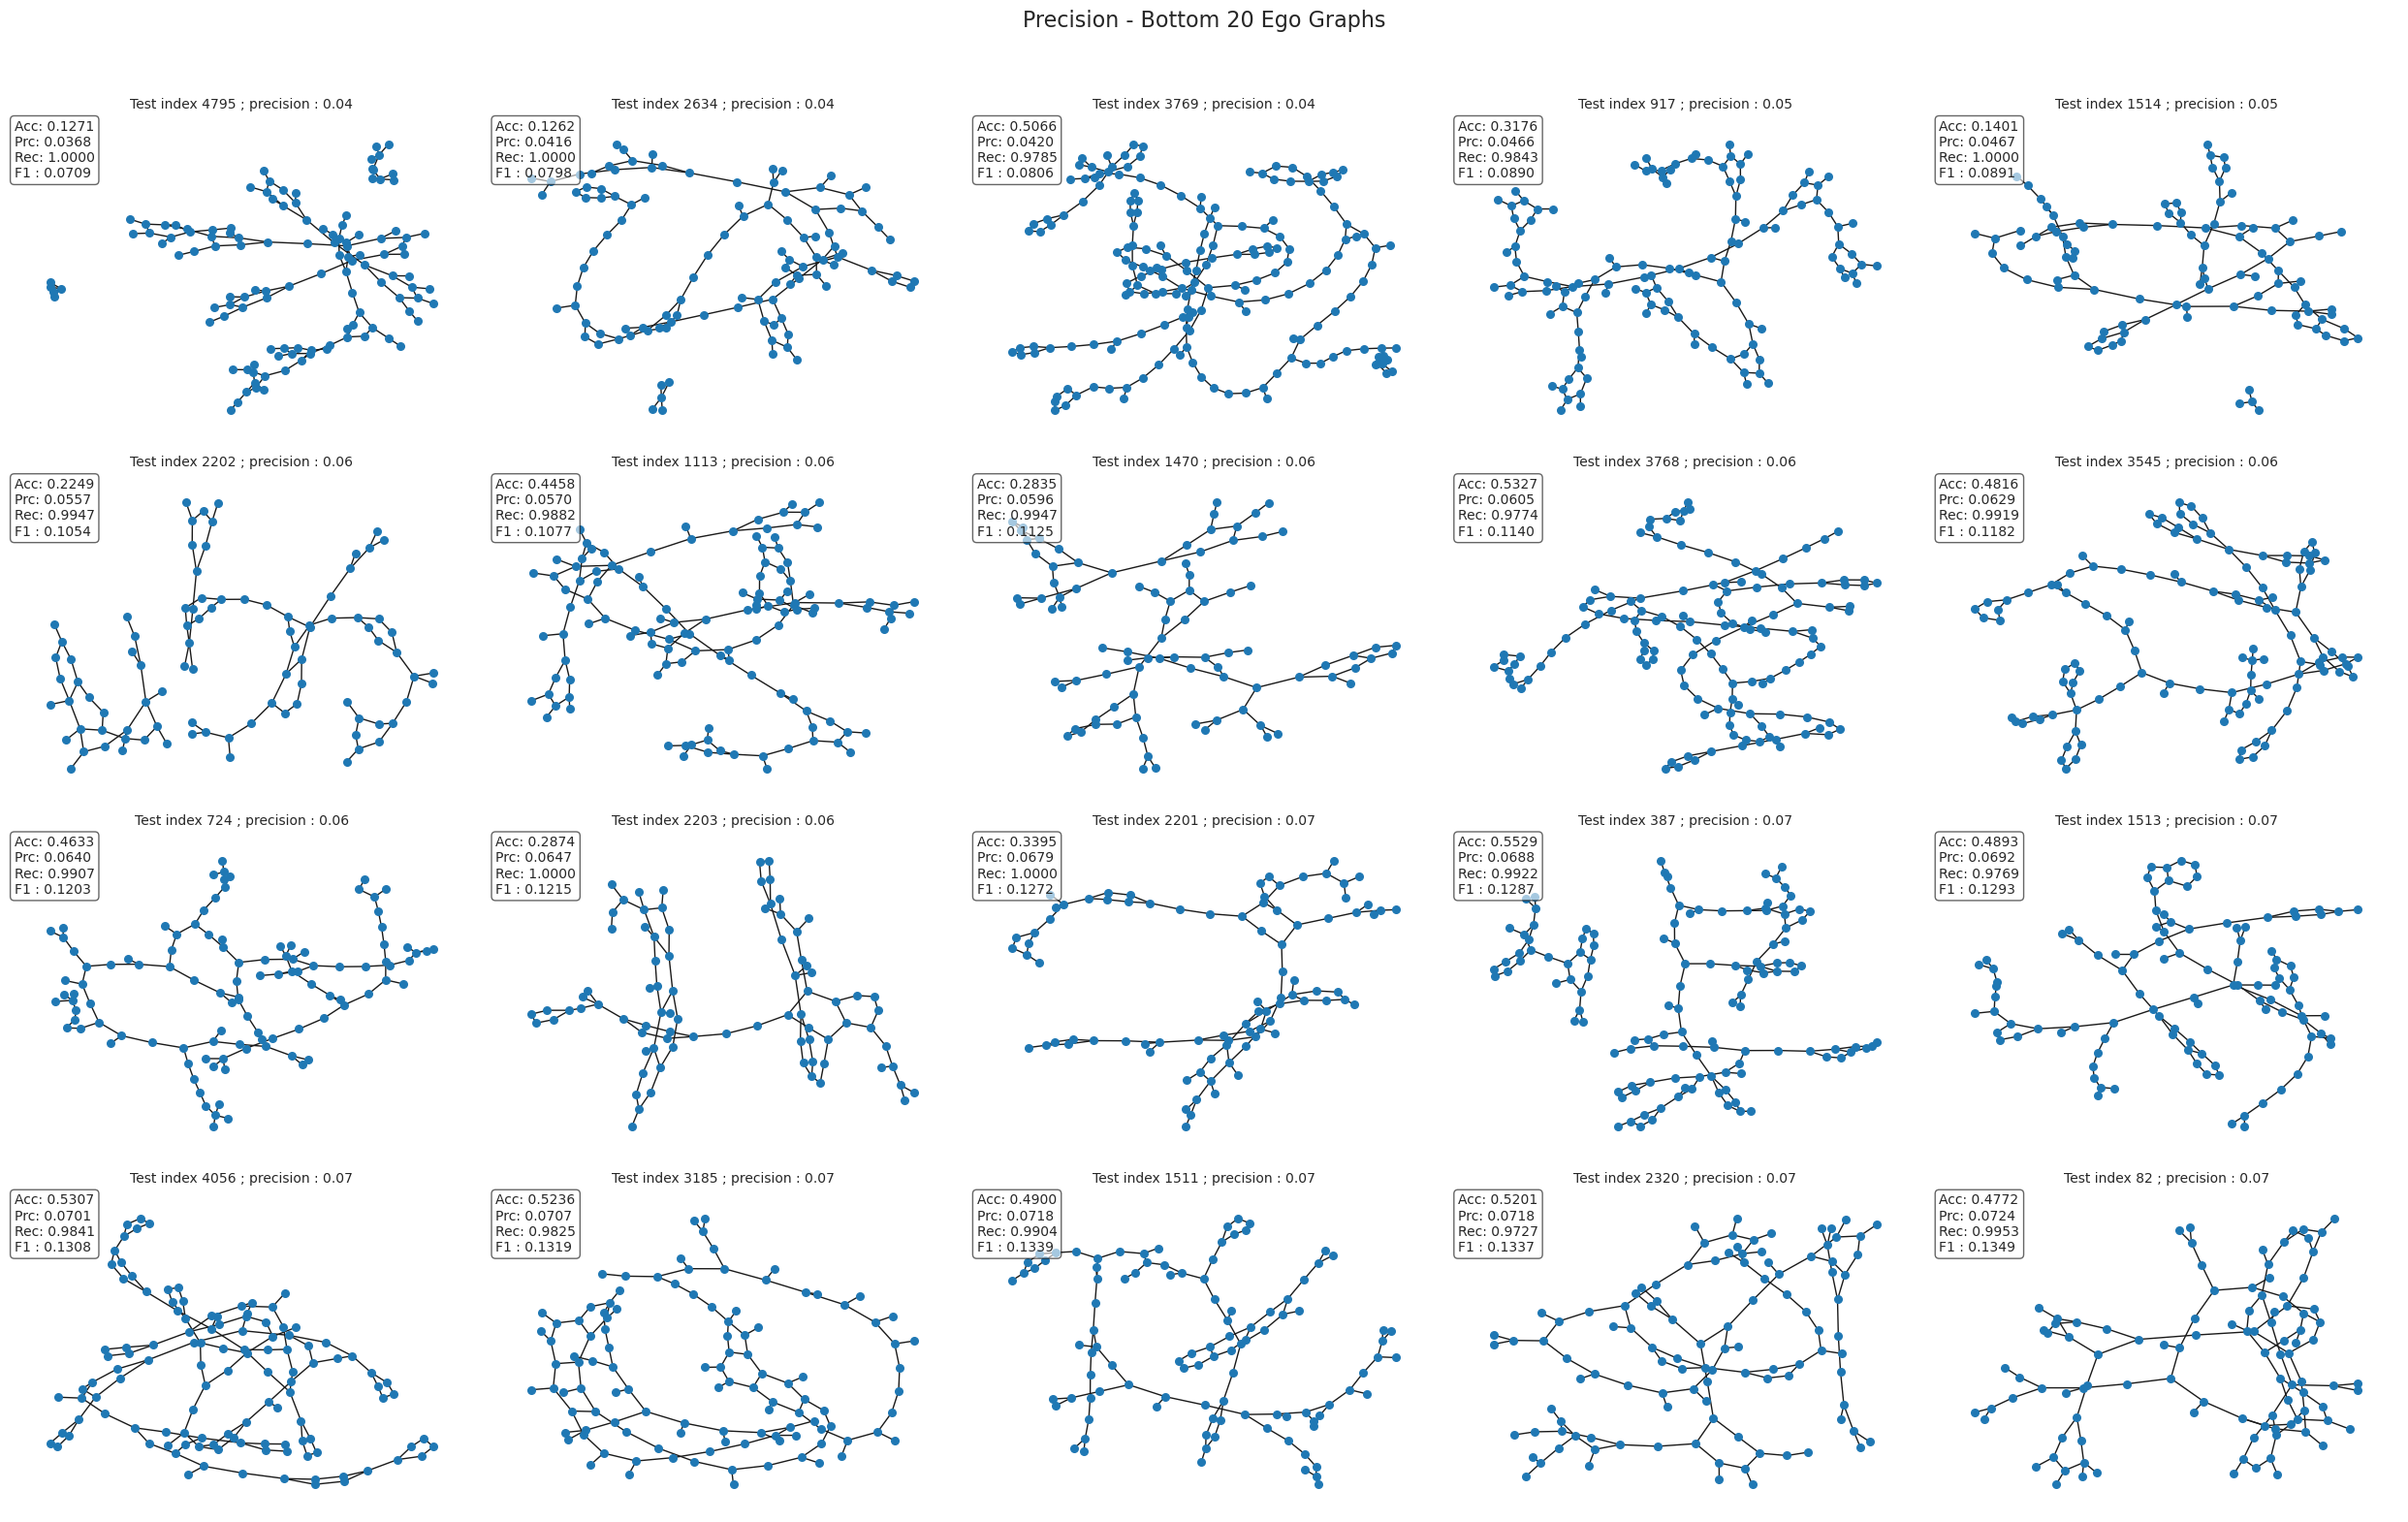

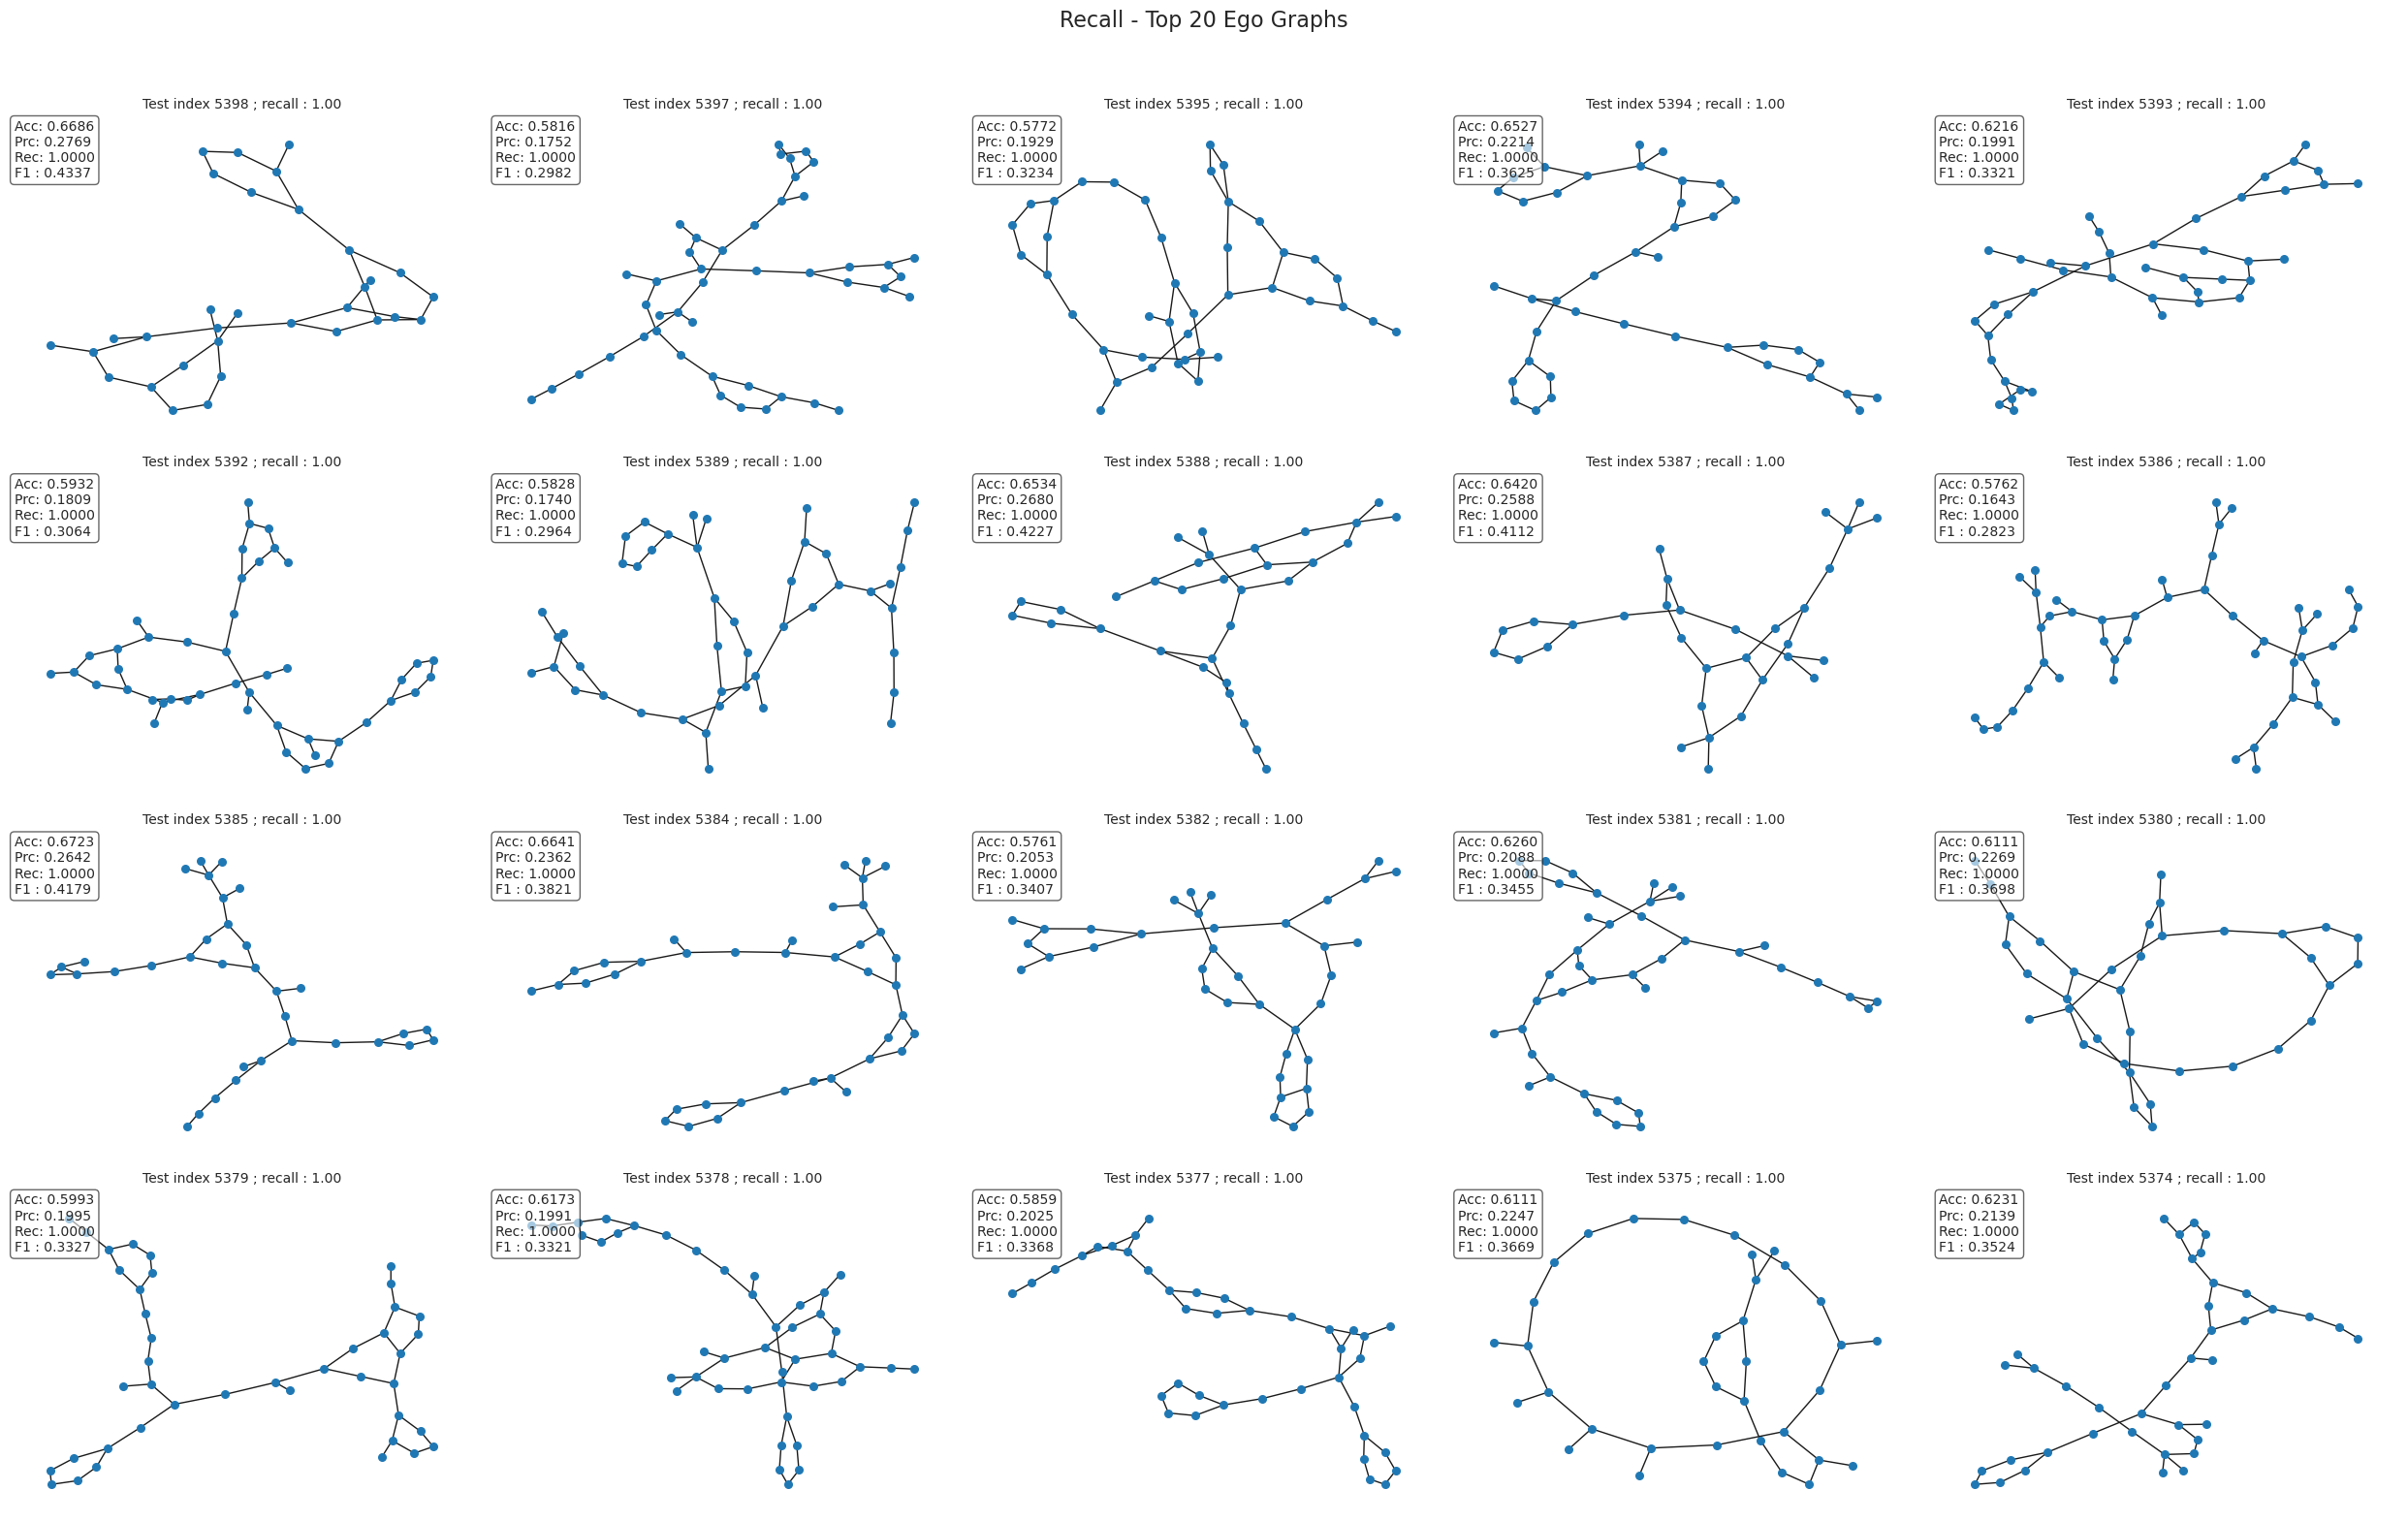

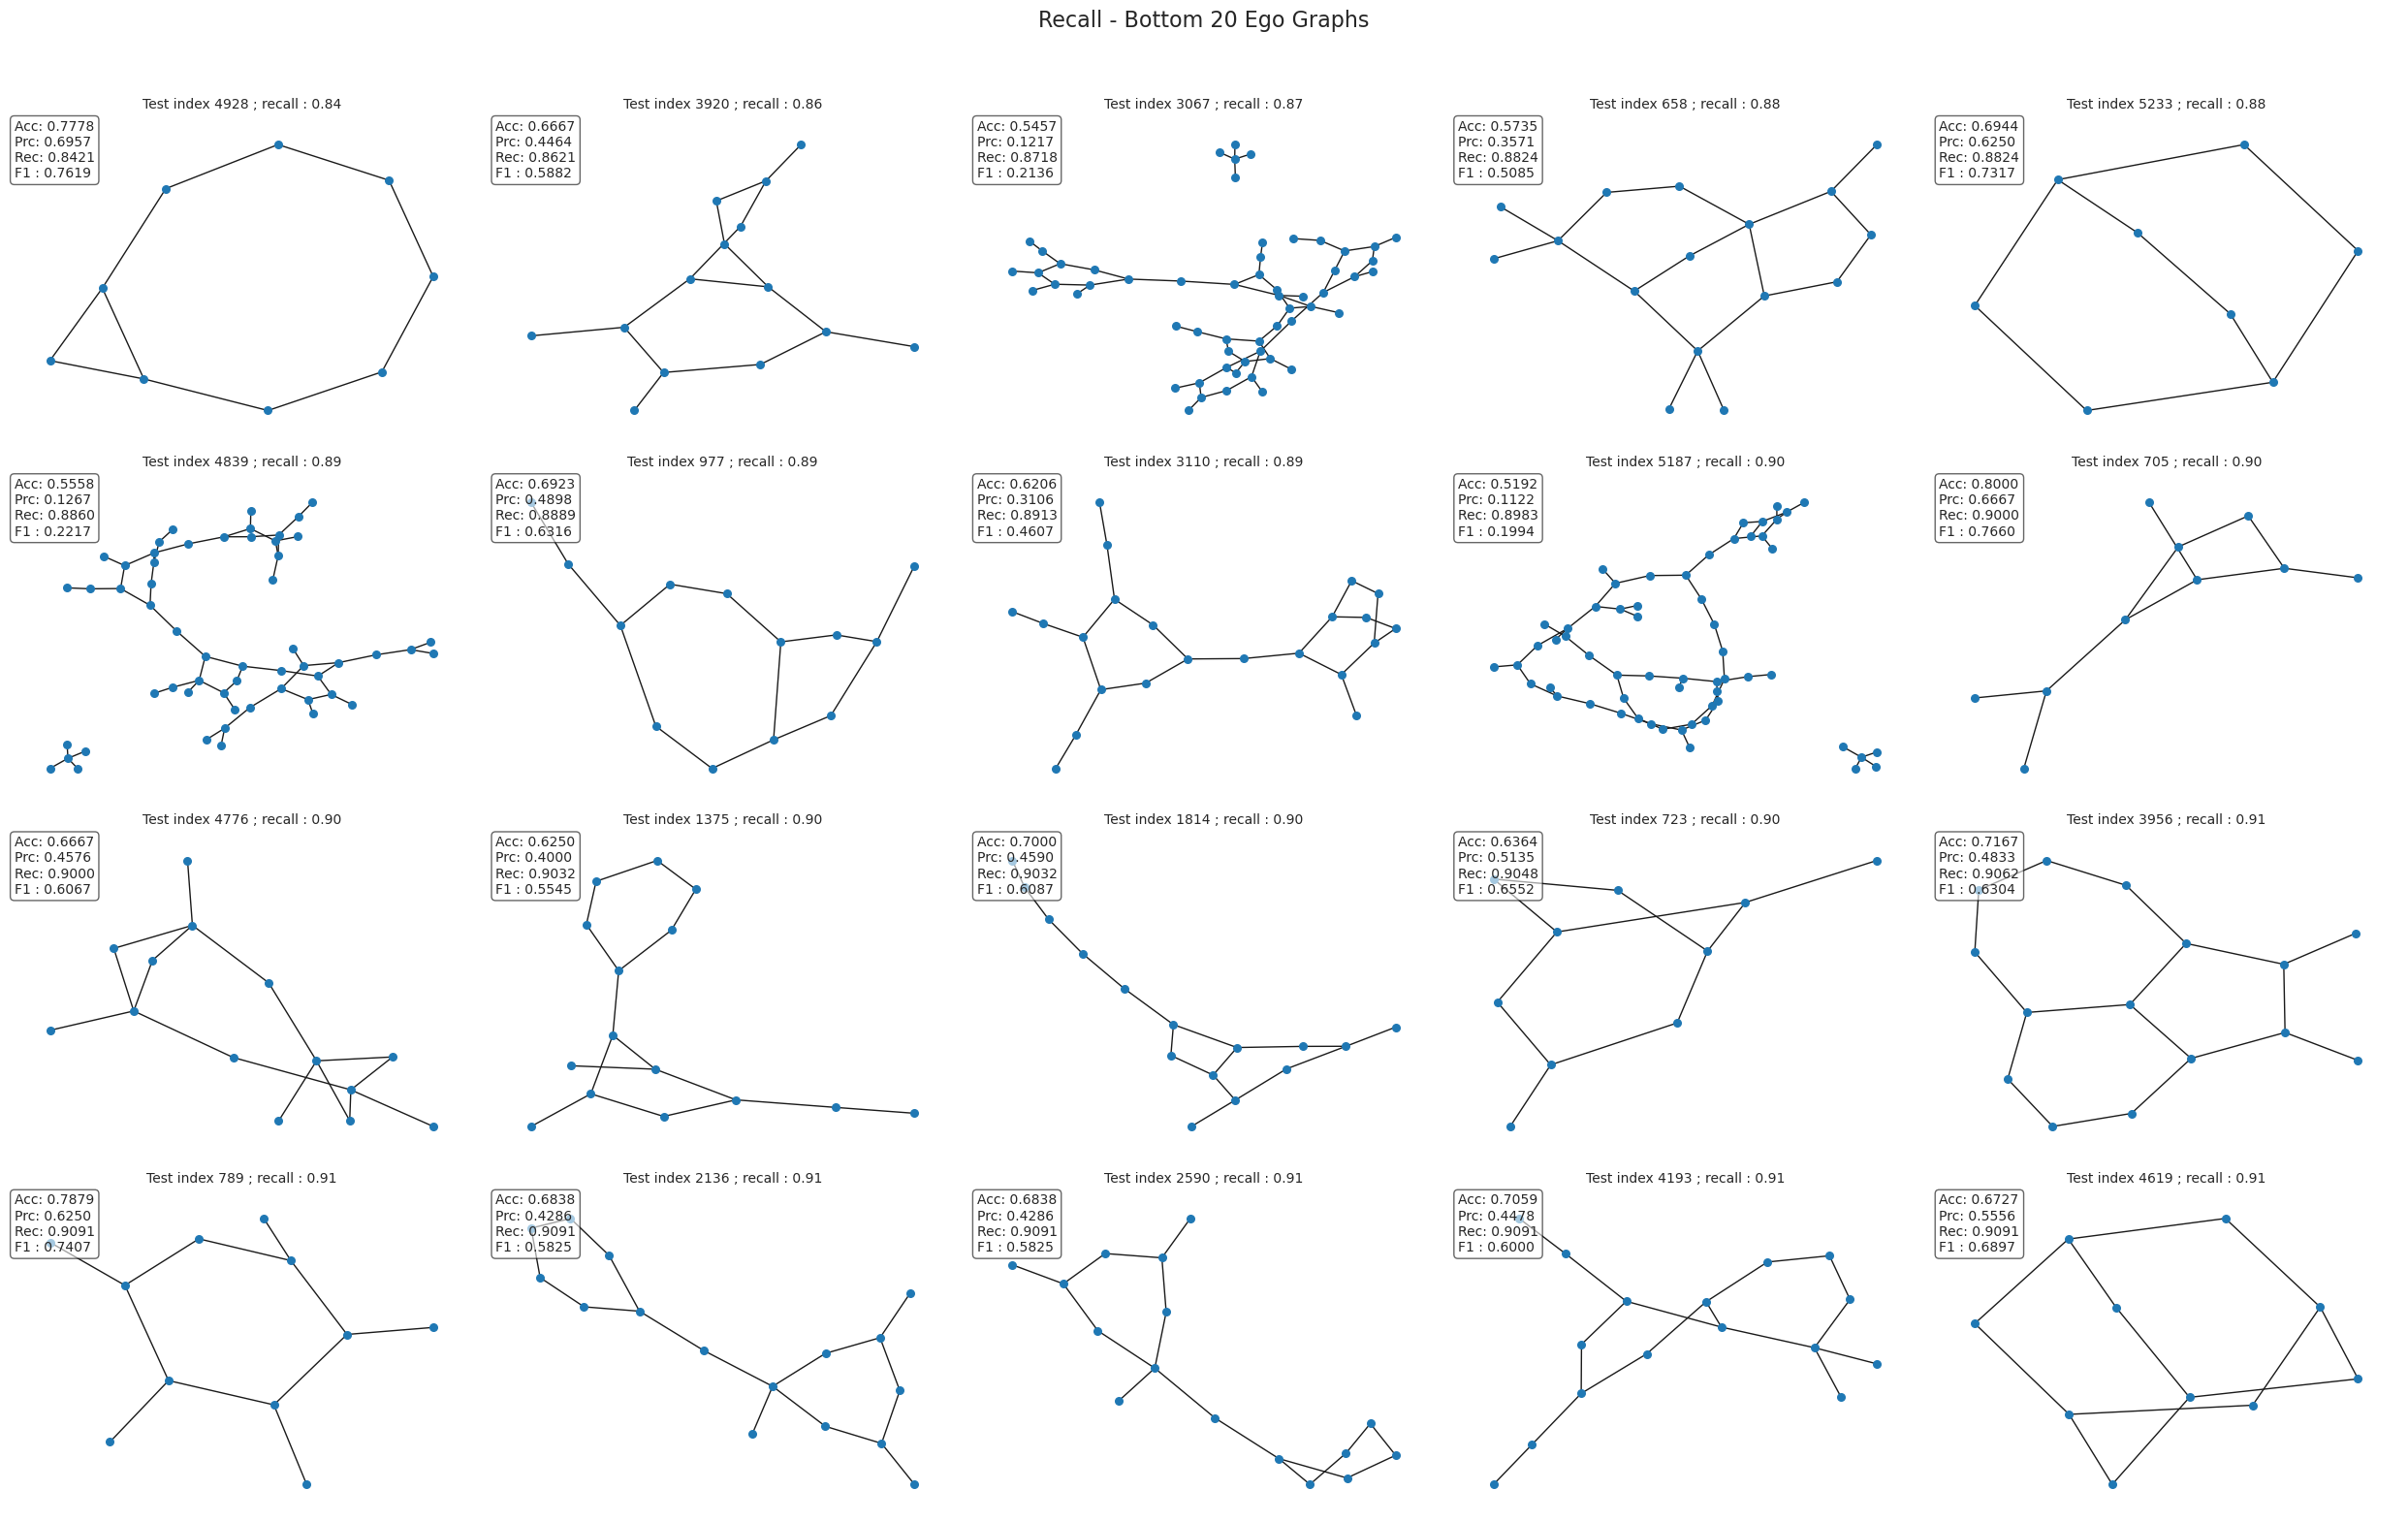

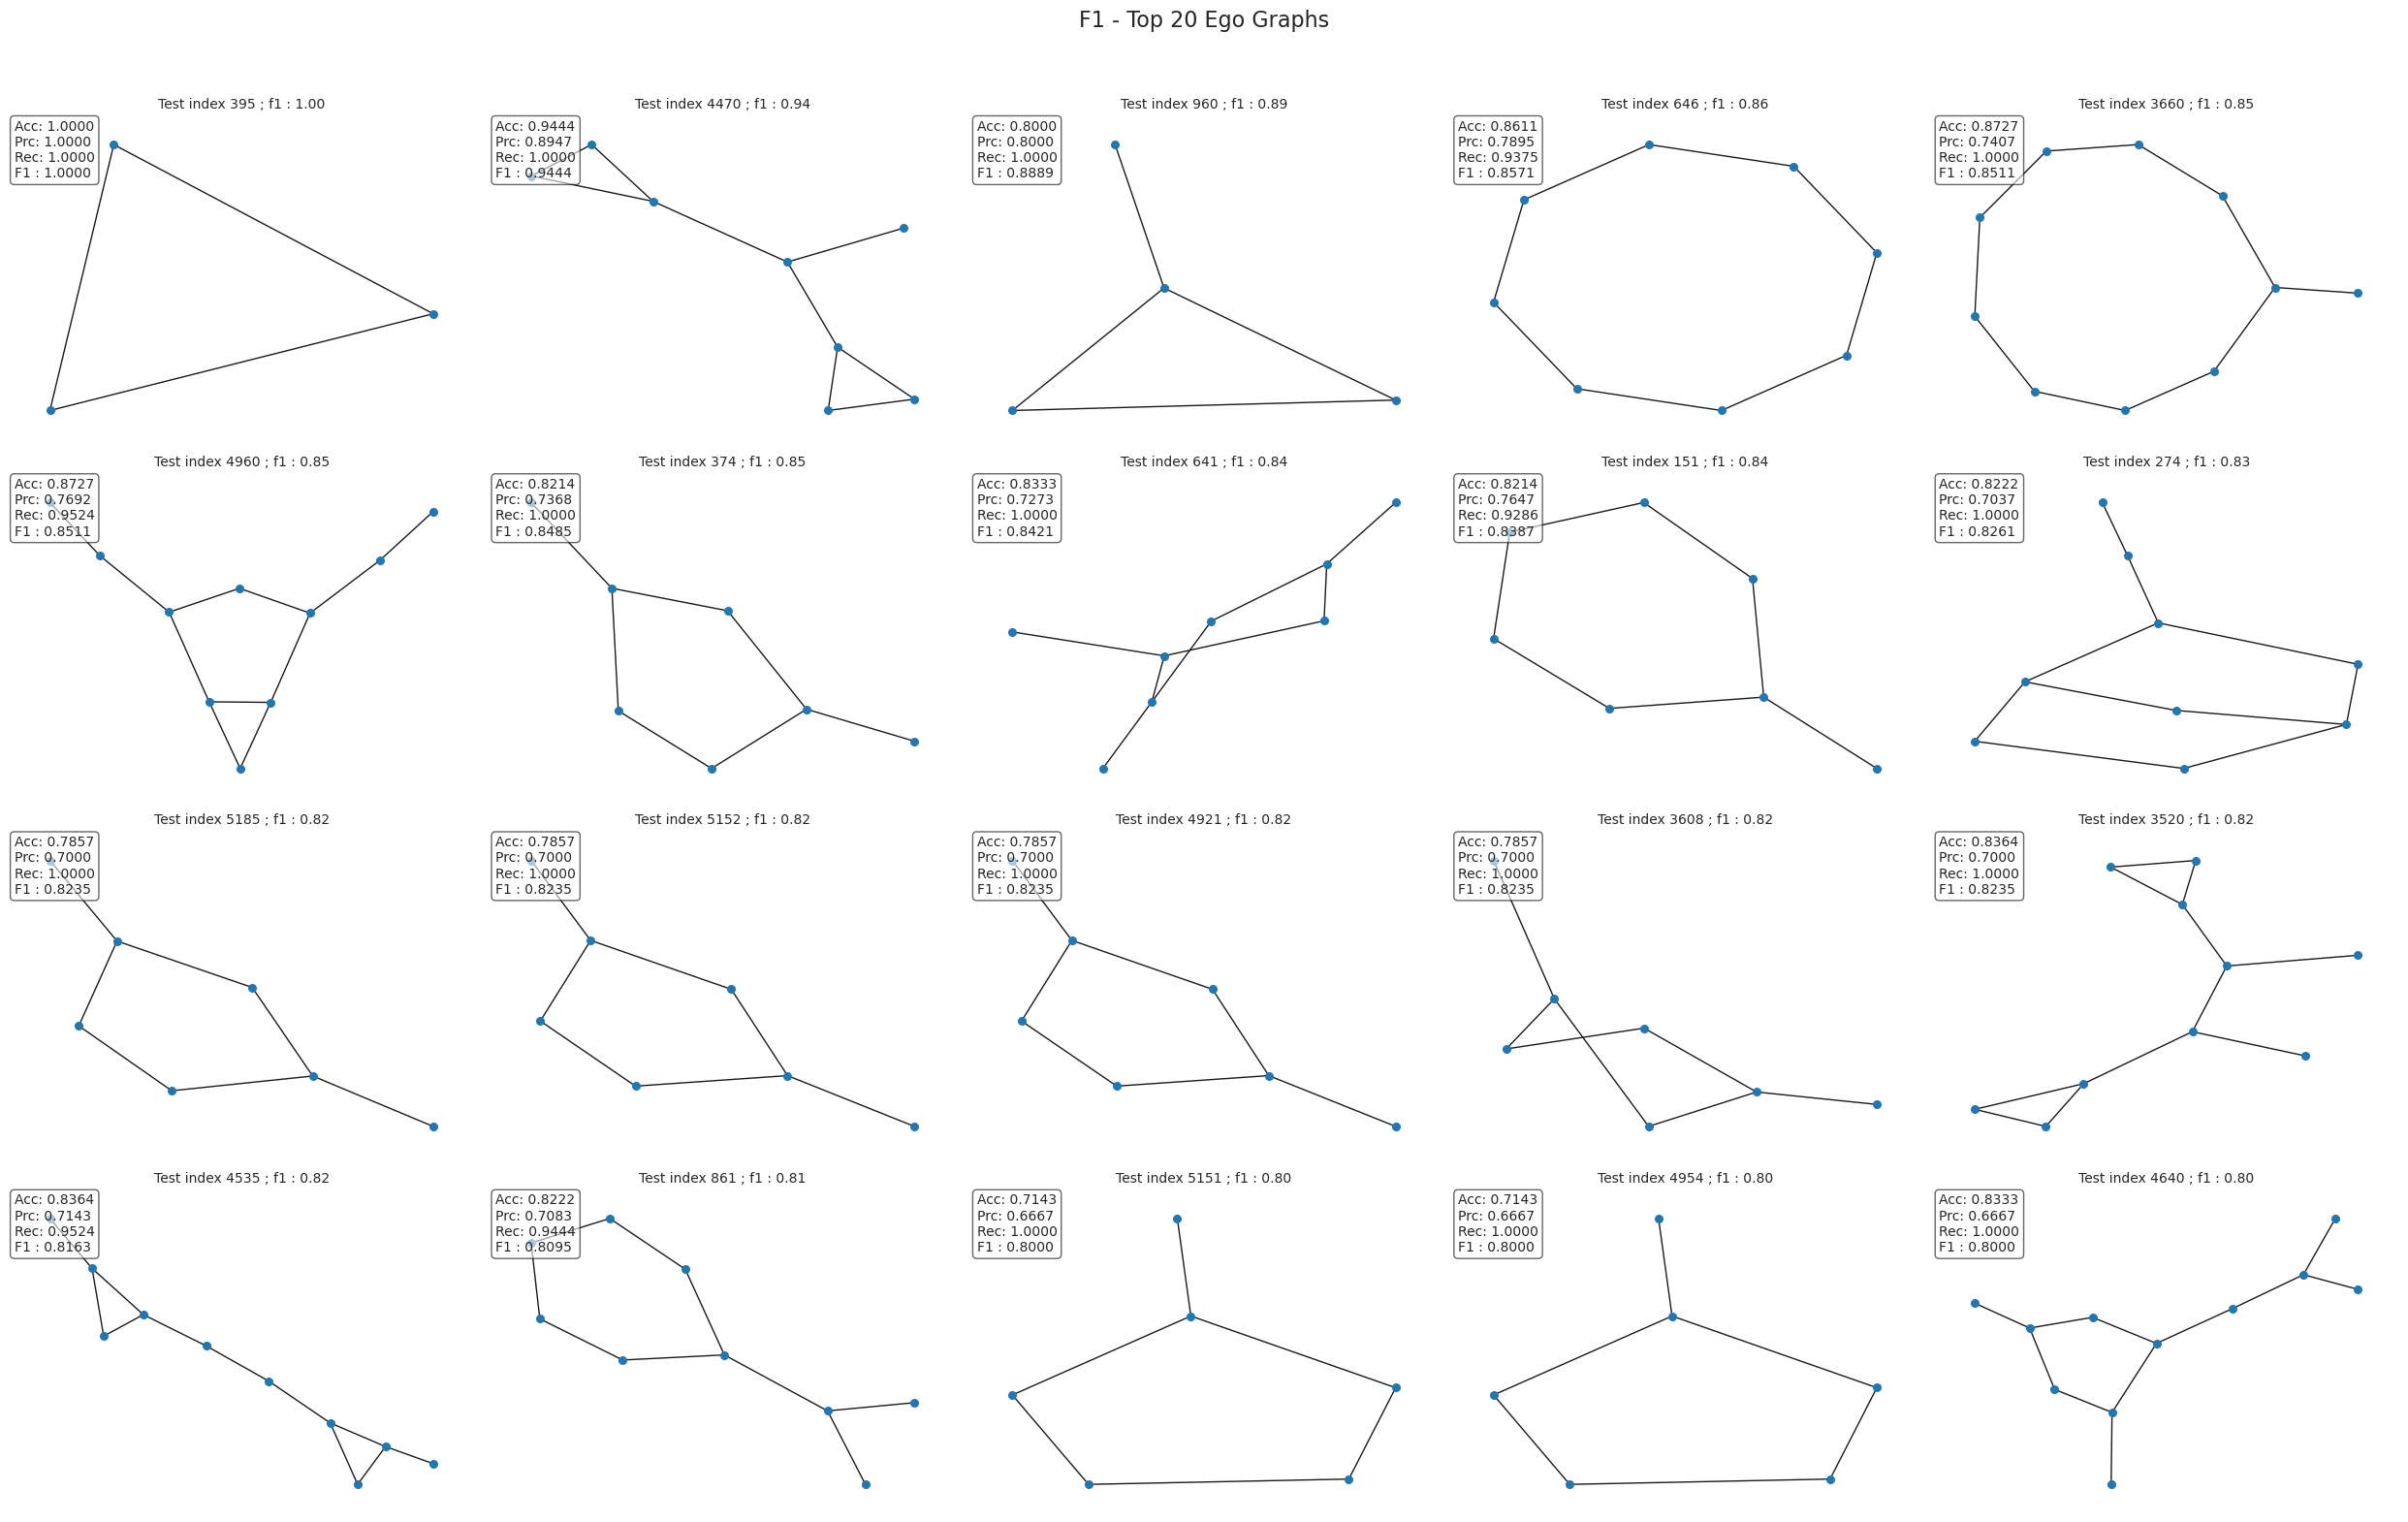

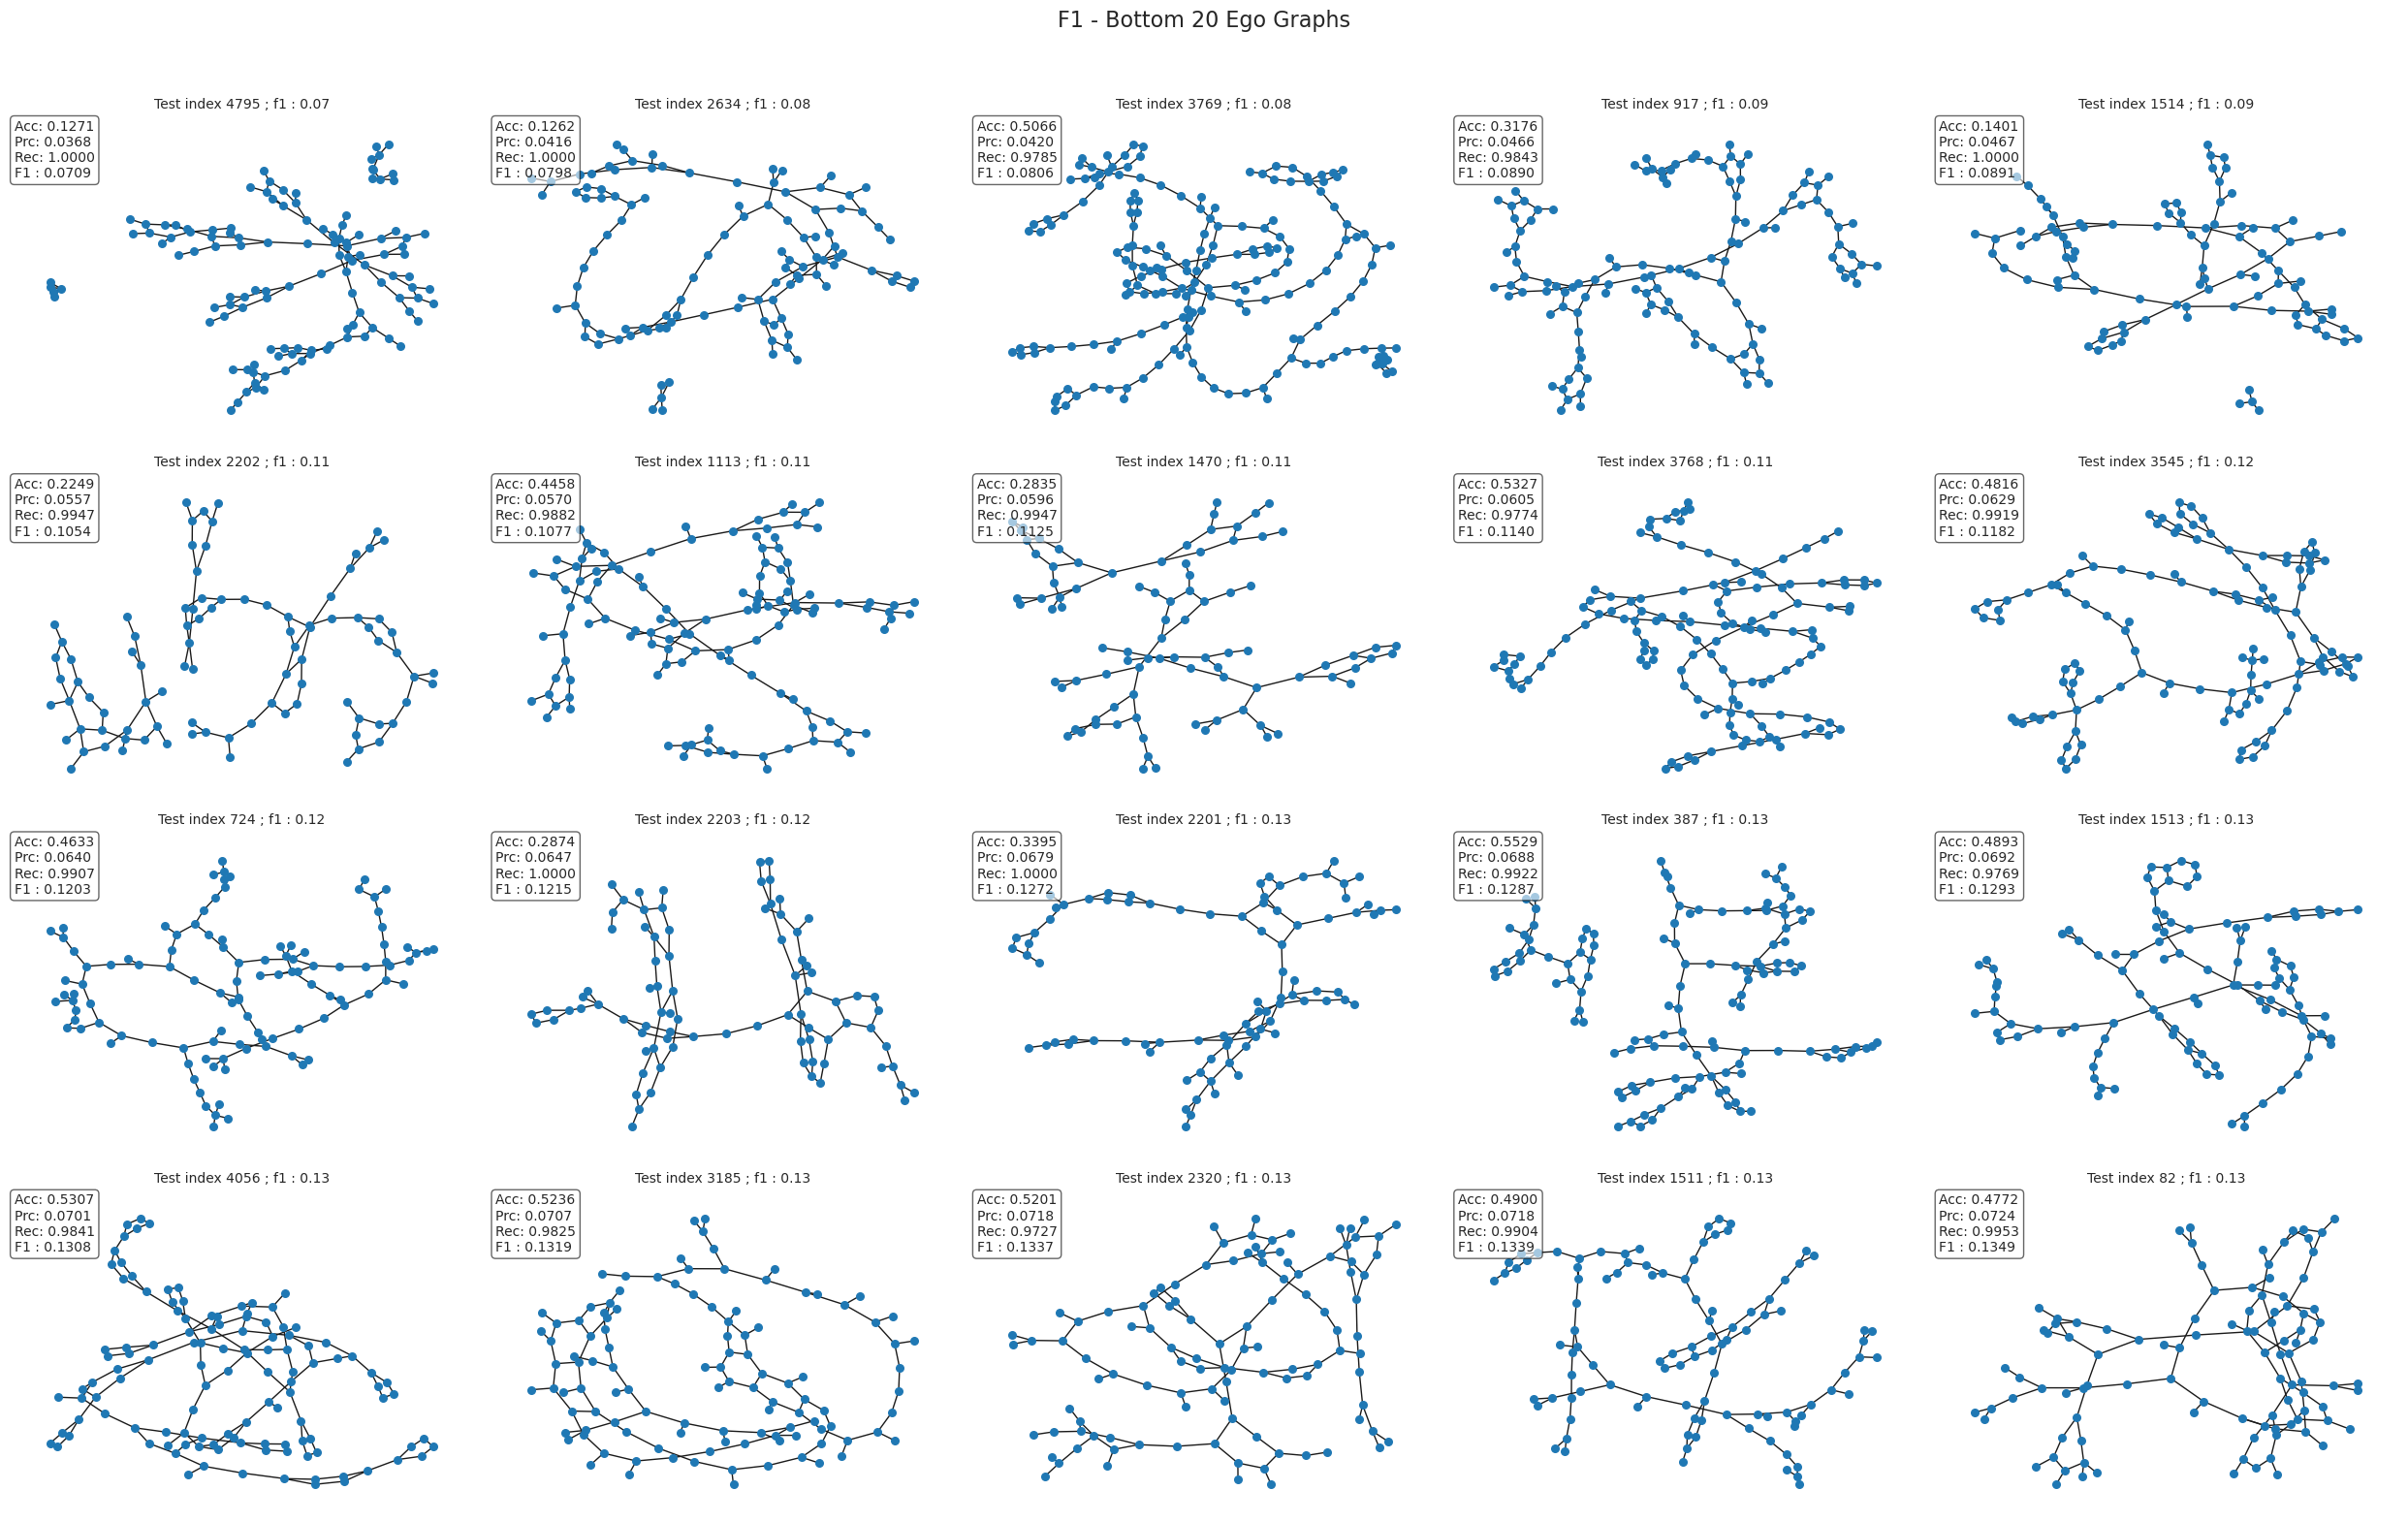

In [18]:
def draw_ego_graphs_from_centers(res_indices, indices, title, remove_global_node=True,rows=4, cols=5):
    import networkx as nx
    import matplotlib.pyplot as plt
    from networkx import ego_graph

    # 转换 DGL 图为 NetworkX 图

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for i, (ind,j) in enumerate(zip(indices,res_indices)):
        if i >= len(axes):
            break
        g = graph_test[ind]['graph']
        ego = g.to_networkx().to_undirected()
        ego.remove_edges_from(nx.selfloop_edges(ego))
        if remove_global_node:
            last_node = list(ego.nodes())[-1]
            ego.remove_node(last_node)
        pos = nx.spring_layout(ego, seed=42)
        nx.draw(ego, pos, ax=axes[i], node_size=30, with_labels=False)
        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            # metric是在title中给出的，现在从中提取出来
            if metric.capitalize() in title:
                break
        axes[i].set_title(f"Test index {ind} ; {metric} : {complete_res[ind][metric]:.2f}", fontsize=10)

        # 提取当前 node 的 metric 信息
        m = complete_res[j]  # 假设 metrics 与 center_nodes 一一对应，且是字典列表

        # 添加批注文本
        info_text = (
            f"Acc: {m['accuracy']:.4f}\n"
            f"Prc: {m['precision']:.4f}\n"
            f"Rec: {m['recall']:.4f}\n"
            f"F1 : {m['f1']:.4f}"
        )
        # 在图的左下角添加注释
        '''axes[i].text(0.01, -0.15, info_text, transform=axes[i].transAxes,
                    fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))'''
        axes[i].text(0.01, 0.99, info_text, transform=axes[i].transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='left',
             bbox=dict(facecolor='white', edgecolor='black', alpha=0.6, boxstyle='round,pad=0.3'))

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# 画出 top 和 bottom 20 的 ego graphs
result_summary = top_bottom_k_metrics
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    for kind in ['top', 'bottom']:
        centers = [entry['center'] for entry in result_summary[metric][kind]]
        indices = [entry['index'] for entry in result_summary[metric][kind]]
        draw_ego_graphs_from_centers(
            res_indices = indices,
            indices = centers,
            title=f"{metric.capitalize()} - {kind.capitalize()} 20 Ego Graphs"
        )


In [19]:
import random

seed = 42
random.seed(seed)
# 从 top_bottom_k_metrics 的每个metric中随机选择 5 个节点
def get_random_nodes_from_top_bottom_k(metrics_dict, k=5):
    random_nodes,all_indices = {},[]
    for metric, data in metrics_dict.items():
        some_node_indices = set([entry['index'] for entry in data['bottom']])
        random_nodes[metric] = random.sample(some_node_indices, k)
        all_indices.extend(random_nodes[metric])
    return random_nodes,all_indices

top_bottom_k_metrics = get_top_bottom_k_metrics(test_res_at_best_acc, k=20)
random_bad_nodes_indices,all_indices = get_random_nodes_from_top_bottom_k(top_bottom_k_metrics, k=5)
random_bad_nodes_indices,len(all_indices)
# indices for complete_res

/tmp/ipykernel_3930055/3753552760.py:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes[metric] = random.sample(some_node_indices, k)


({'accuracy': [2203, 1164, 1476, 1600, 1386],
  'precision': [2202, 2201, 1513, 917, 4056],
  'recall': [658, 4619, 789, 4776, 4928],
  'f1': [1511, 387, 1513, 3768, 4056]},
 20)

In [20]:
random_nodes_indices = random.sample(set(range(len(complete_res)))-set(all_indices), 10)
random_nodes_indices

/tmp/ipykernel_3930055/2868176083.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes_indices = random.sample(set(range(len(complete_res)))-set(all_indices), 10)


[1815, 3692, 4844, 2291, 53, 1312, 3475, 2800, 2289, 1278]

In [21]:
random_all_nodes_indices = random_bad_nodes_indices
random_all_nodes_indices['random'] = random_nodes_indices
random_all_nodes_indices

{'accuracy': [2203, 1164, 1476, 1600, 1386],
 'precision': [2202, 2201, 1513, 917, 4056],
 'recall': [658, 4619, 789, 4776, 4928],
 'f1': [1511, 387, 1513, 3768, 4056],
 'random': [1815, 3692, 4844, 2291, 53, 1312, 3475, 2800, 2289, 1278]}

In [22]:
all_indices.extend(random_nodes_indices)
len(all_indices)

30

In [23]:
for m,inds in random_all_nodes_indices.items():
    nodes = [complete_res[i]['idx'].item() for i in inds]
    print(m,nodes)

accuracy [2203, 1164, 1476, 1600, 1386]
precision [2202, 2201, 1513, 917, 4056]
recall [658, 4619, 789, 4776, 4928]
f1 [1511, 387, 1513, 3768, 4056]
random [1815, 3692, 4844, 2291, 53, 1312, 3475, 2800, 2289, 1278]


In [ ]:
# top_bottom_k_metrics['accuracy']['bottom']
# complete_res
# TODO: 可视化重建情况 -- 邻接矩阵！（重跑evaluate；基于现有的半边如何恢复为完整的--type：tensor）

Choose according to: accuracy
Acc 0.2874 | Recall 1.0000 | Precision 0.0647 | F1 0.1215


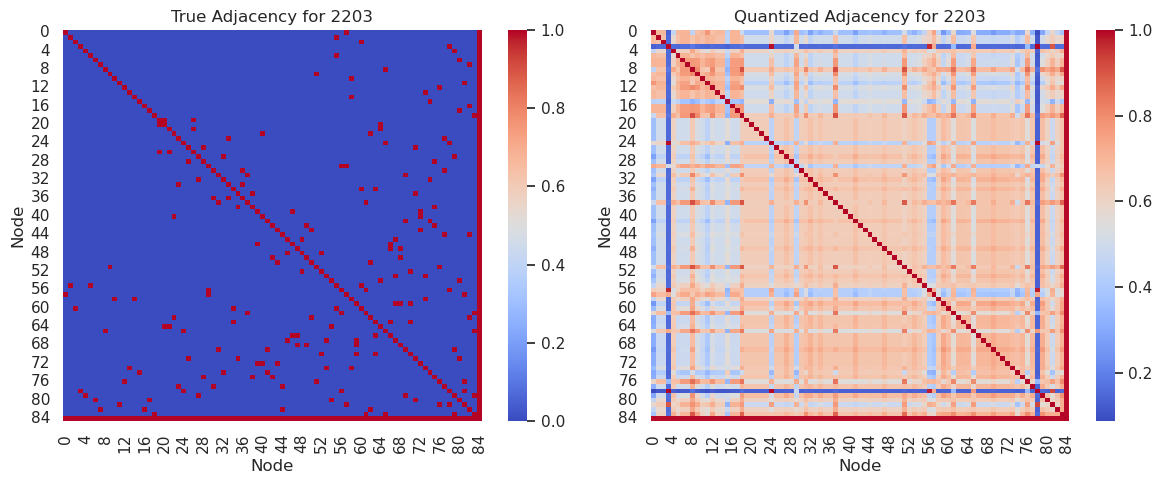

Choose according to: accuracy
Acc 0.3052 | Recall 1.0000 | Precision 0.0978 | F1 0.1782


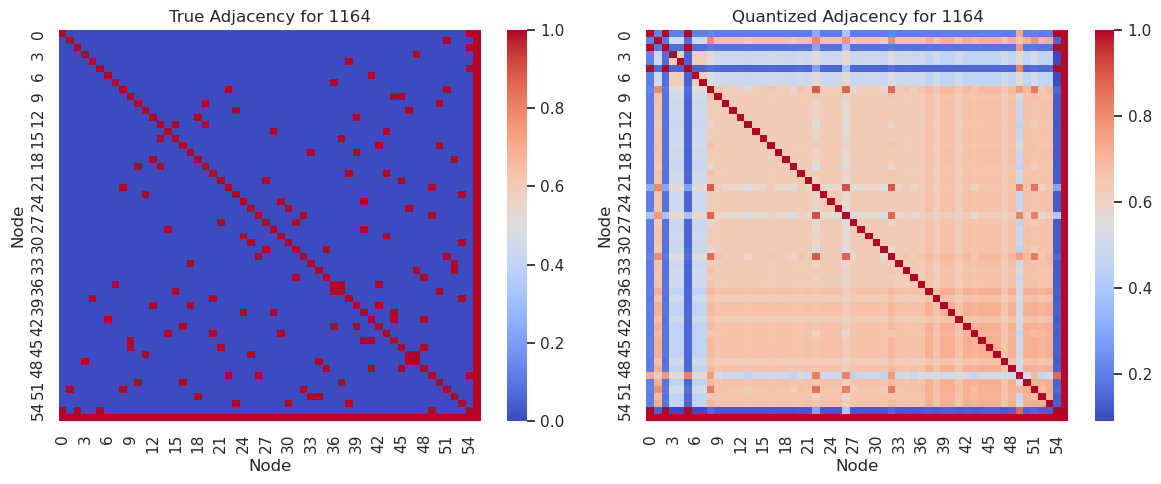

Choose according to: accuracy
Acc 0.3045 | Recall 0.9675 | Precision 0.0884 | F1 0.1620


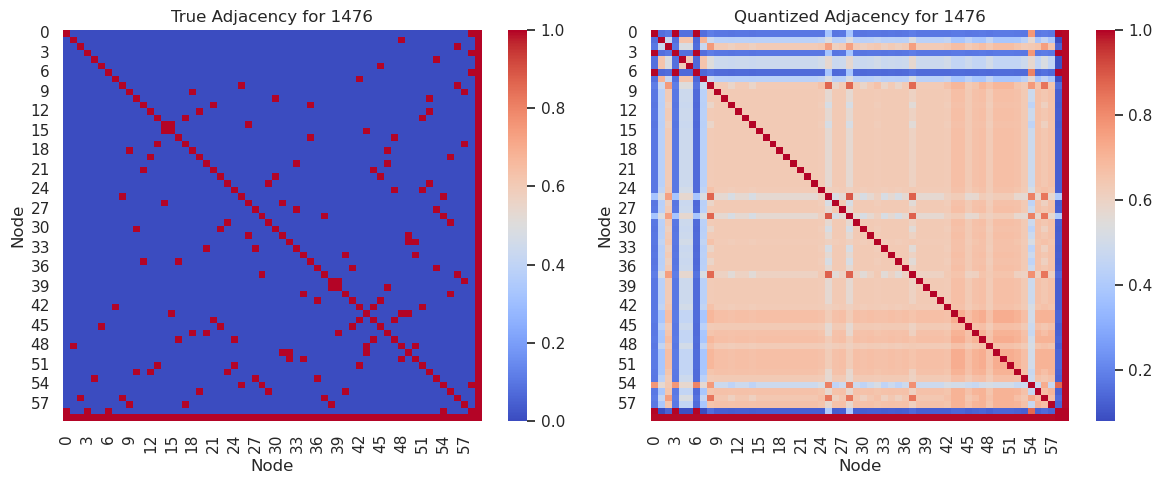

Choose according to: accuracy
Acc 0.2949 | Recall 0.9821 | Precision 0.0985 | F1 0.1790


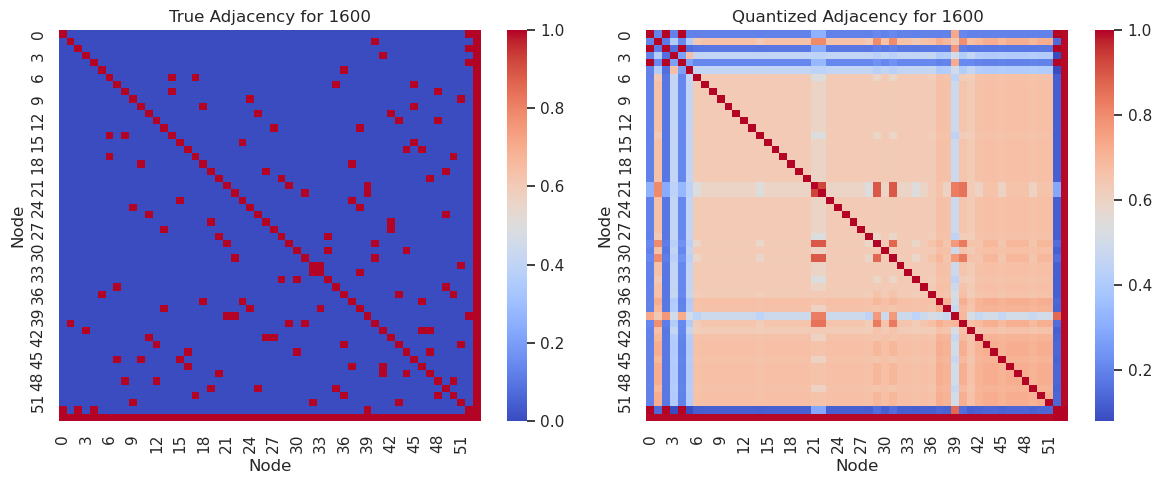

Choose according to: accuracy
Acc 0.3090 | Recall 0.9677 | Precision 0.0896 | F1 0.1640


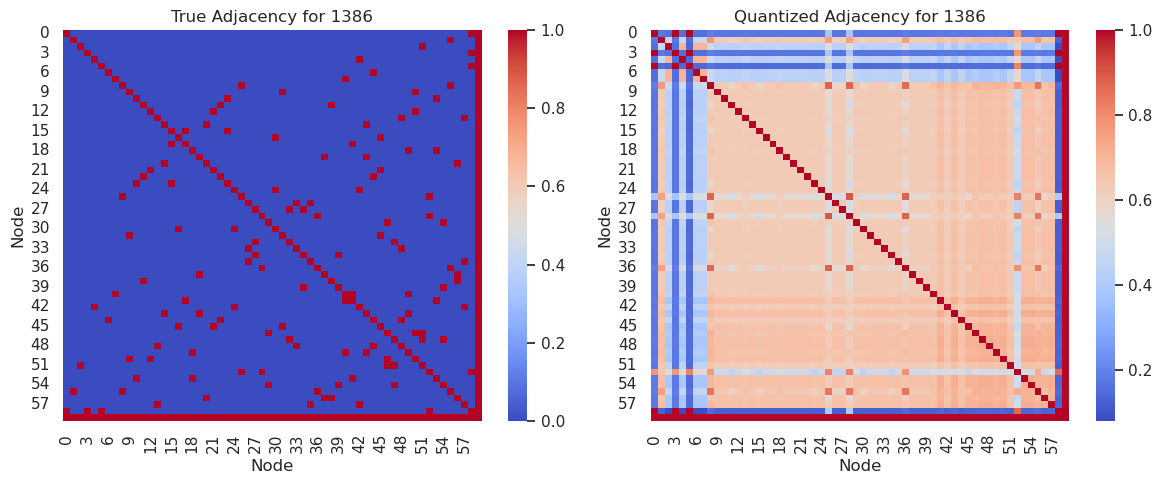

Choose according to: precision
Acc 0.2249 | Recall 0.9947 | Precision 0.0557 | F1 0.1054


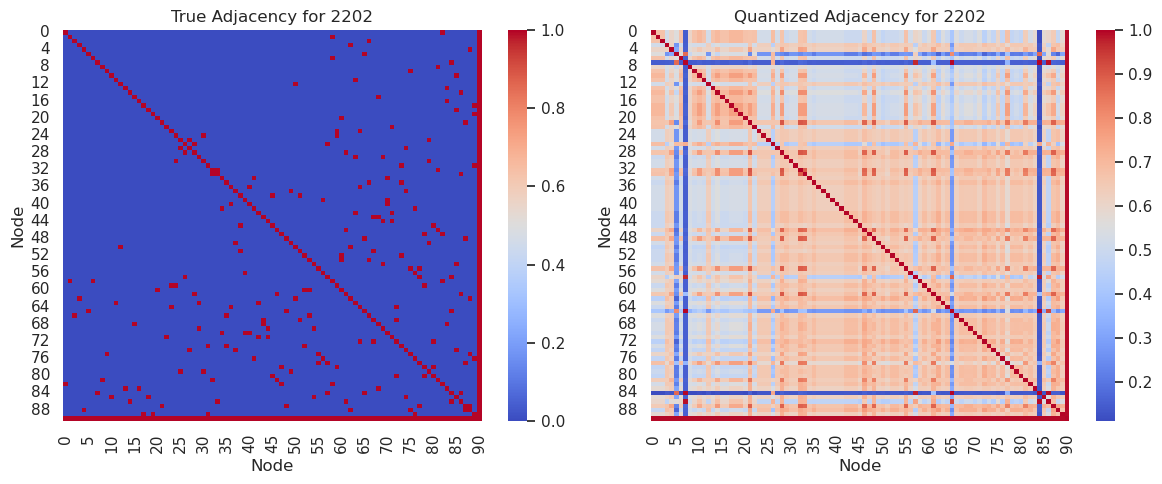

Choose according to: precision
Acc 0.3395 | Recall 1.0000 | Precision 0.0679 | F1 0.1272


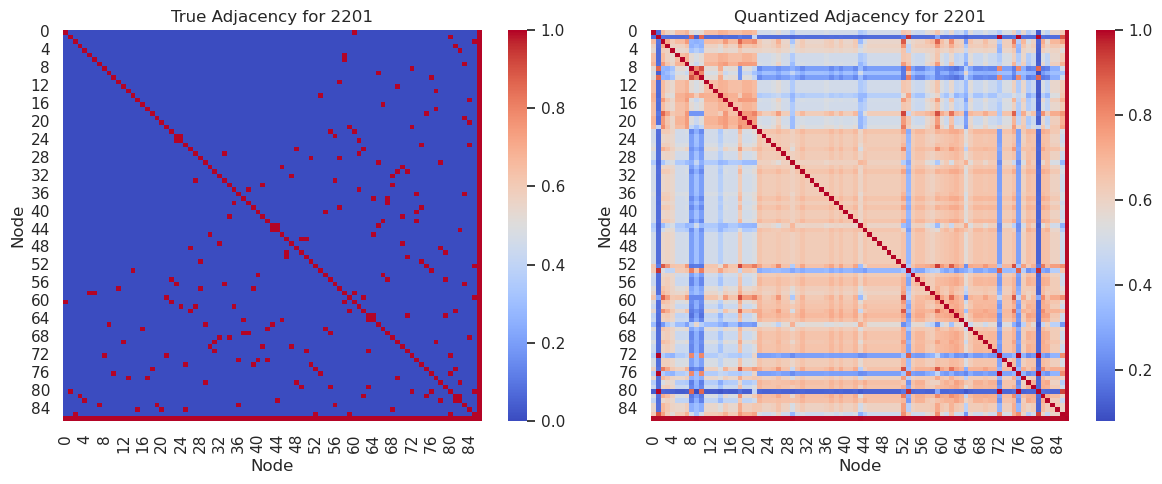

Choose according to: precision
Acc 0.4893 | Recall 0.9769 | Precision 0.0692 | F1 0.1293


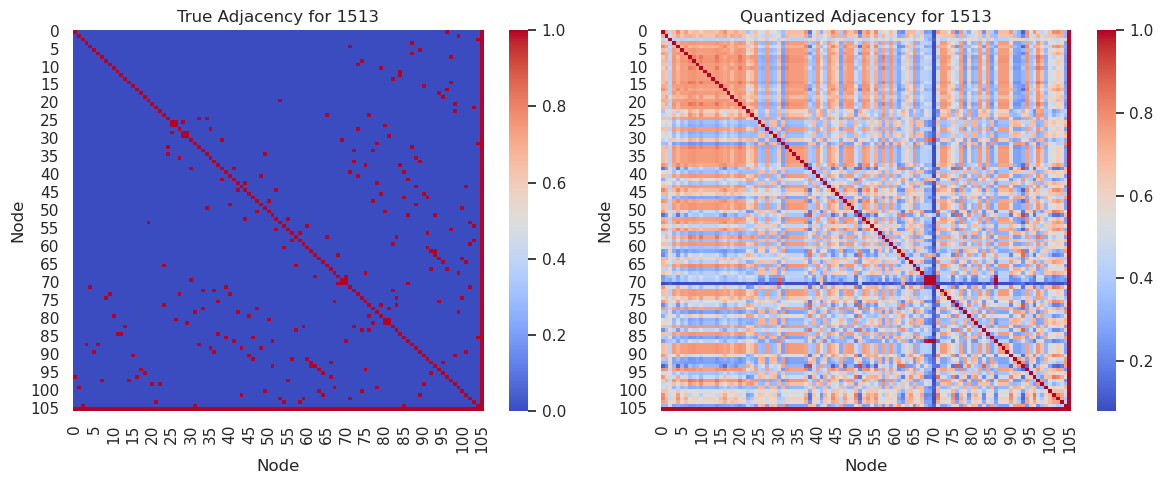

Choose according to: precision
Acc 0.3176 | Recall 0.9843 | Precision 0.0466 | F1 0.0890


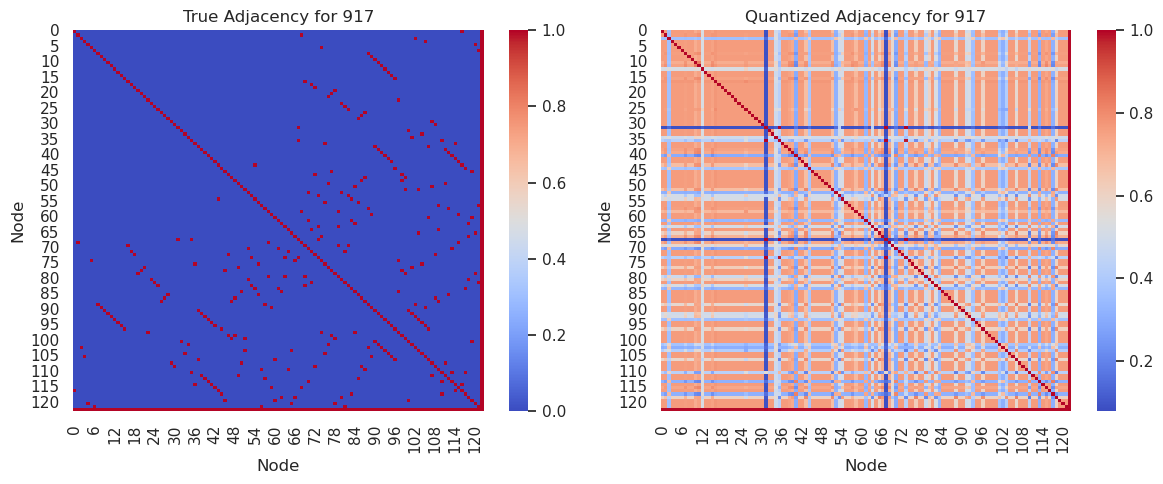

Choose according to: precision
Acc 0.5307 | Recall 0.9841 | Precision 0.0701 | F1 0.1308


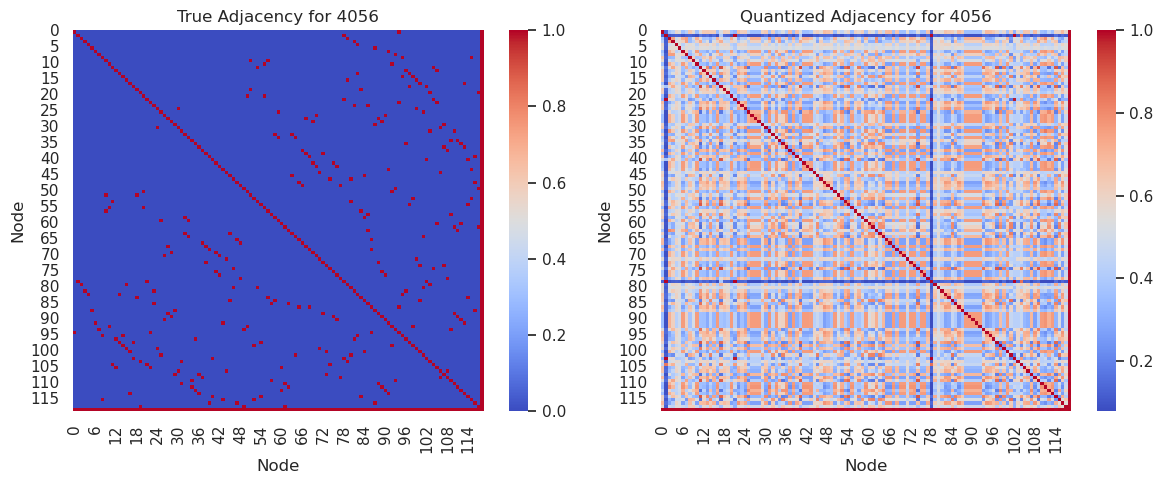

Choose according to: recall
Acc 0.5735 | Recall 0.8824 | Precision 0.3571 | F1 0.5085


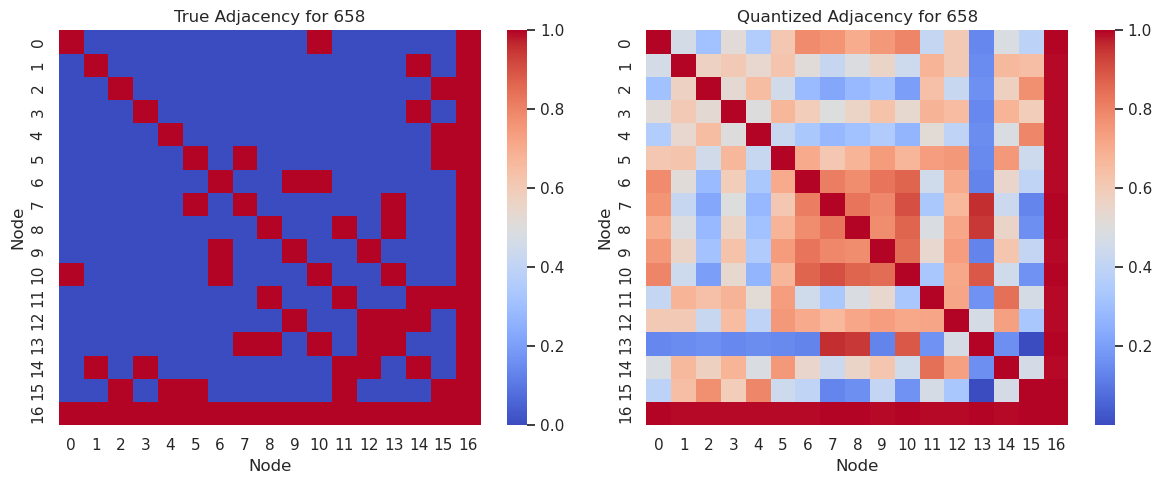

Choose according to: recall
Acc 0.6727 | Recall 0.9091 | Precision 0.5556 | F1 0.6897


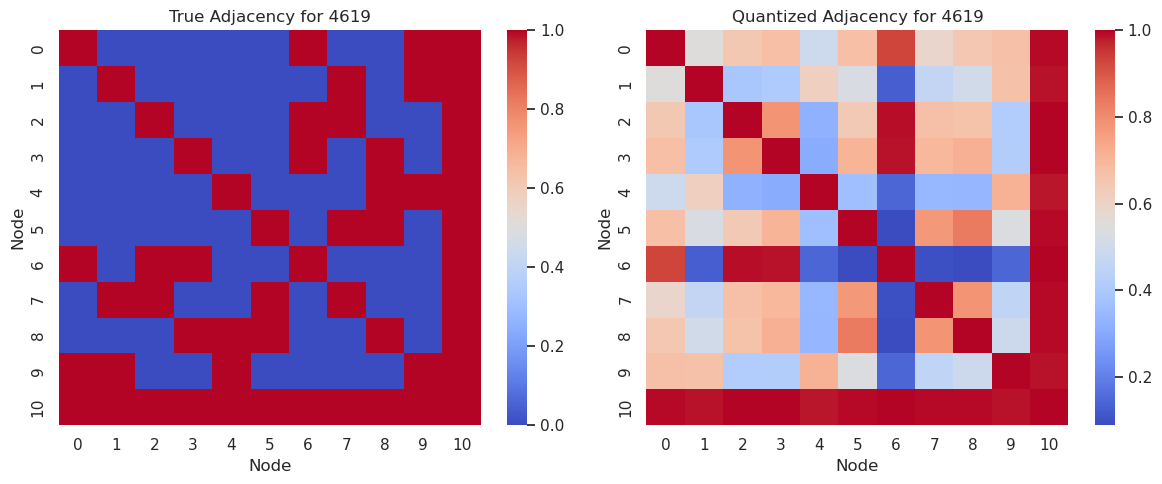

Choose according to: recall
Acc 0.7879 | Recall 0.9091 | Precision 0.6250 | F1 0.7407


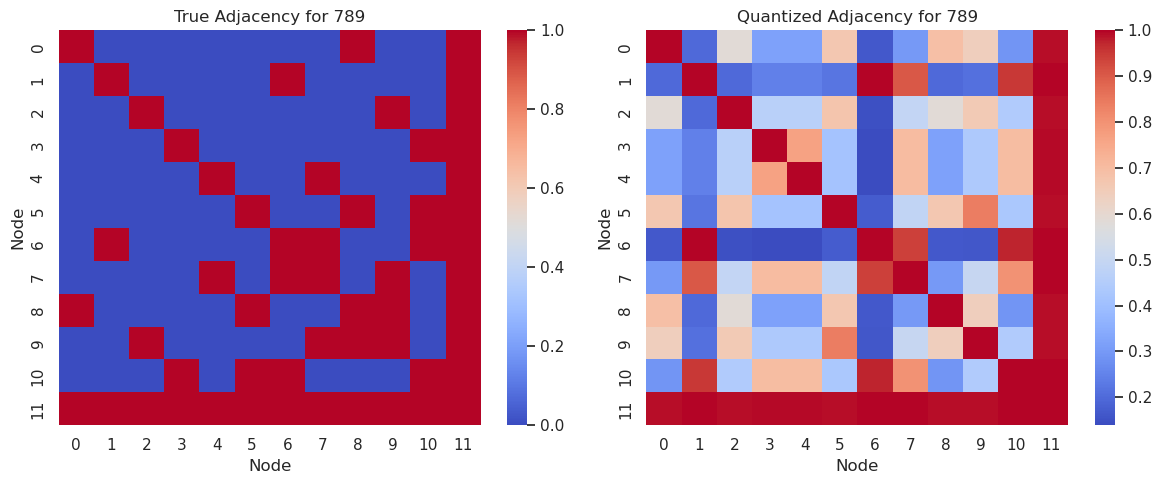

Choose according to: recall
Acc 0.6667 | Recall 0.9000 | Precision 0.4576 | F1 0.6067


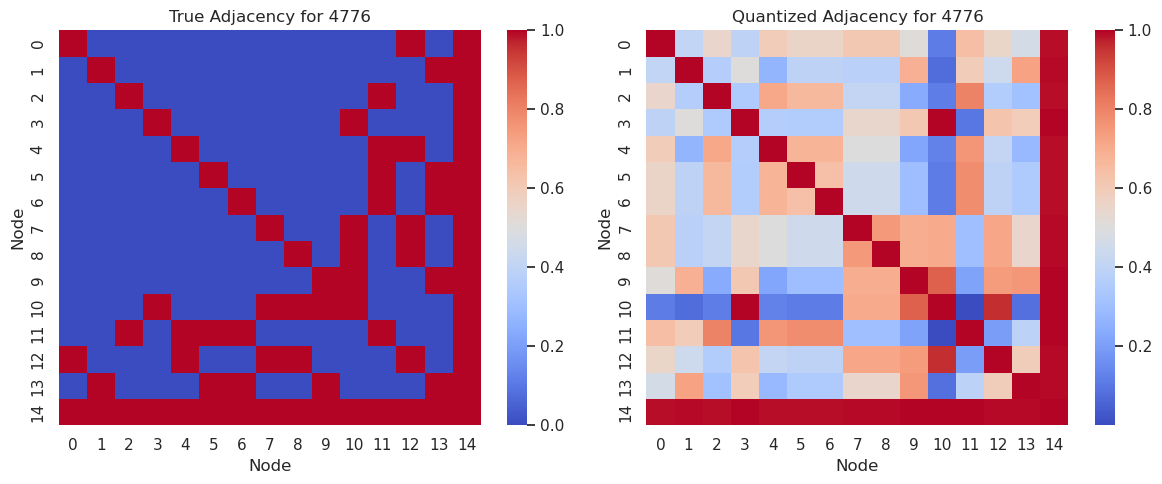

Choose according to: recall
Acc 0.7778 | Recall 0.8421 | Precision 0.6957 | F1 0.7619


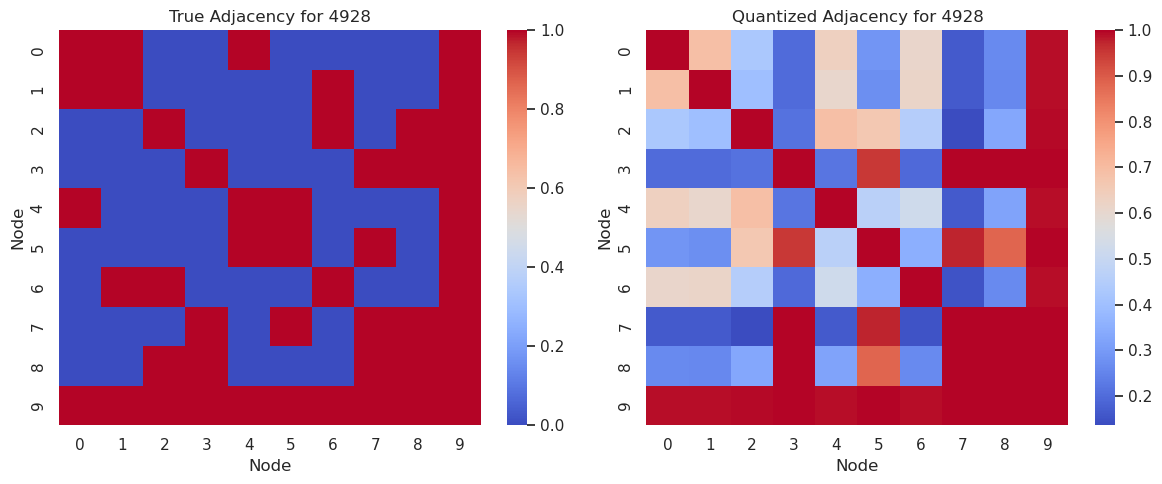

Choose according to: f1
Acc 0.4900 | Recall 0.9904 | Precision 0.0718 | F1 0.1339


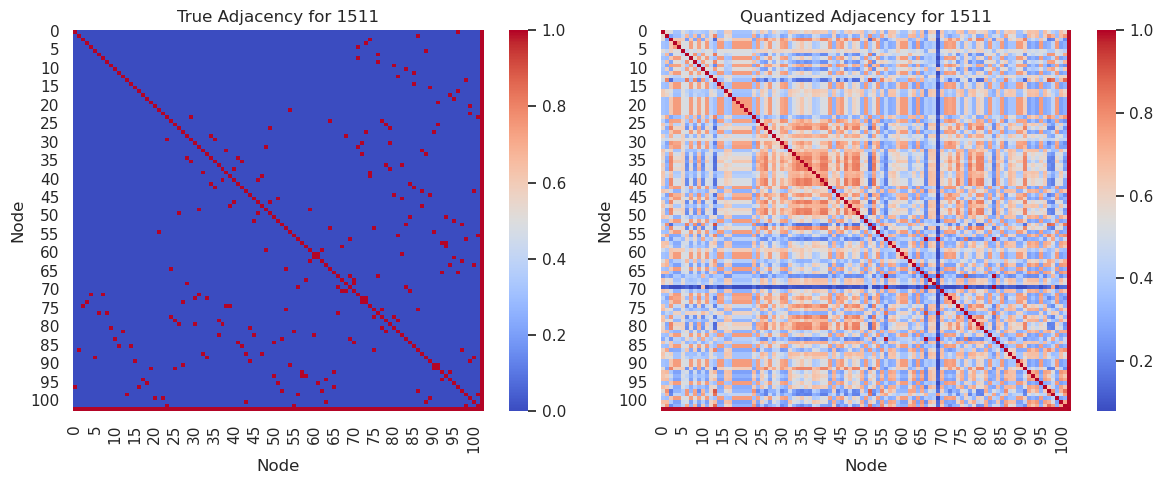

Choose according to: f1
Acc 0.5529 | Recall 0.9922 | Precision 0.0688 | F1 0.1287


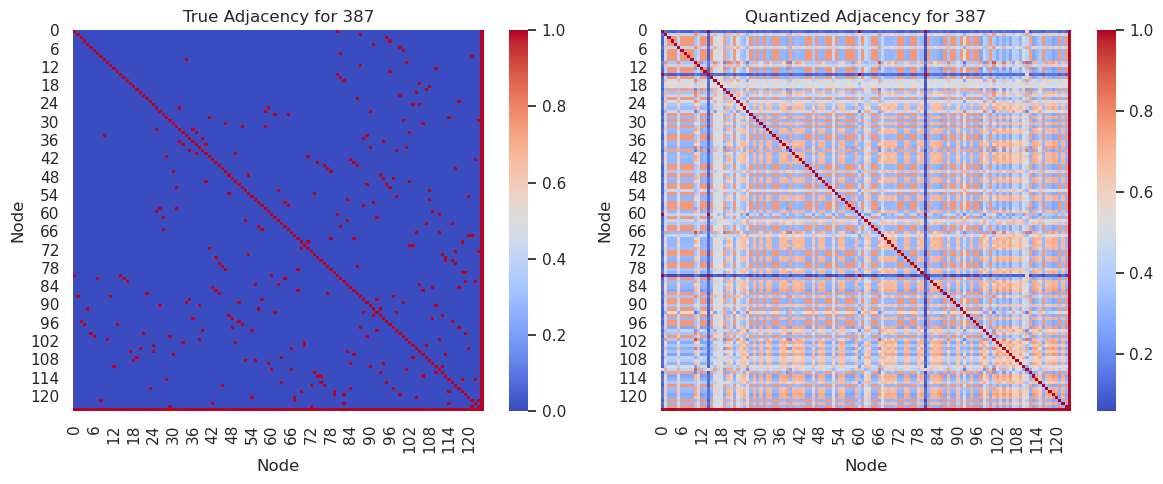

Choose according to: precision
Acc 0.4893 | Recall 0.9769 | Precision 0.0692 | F1 0.1293


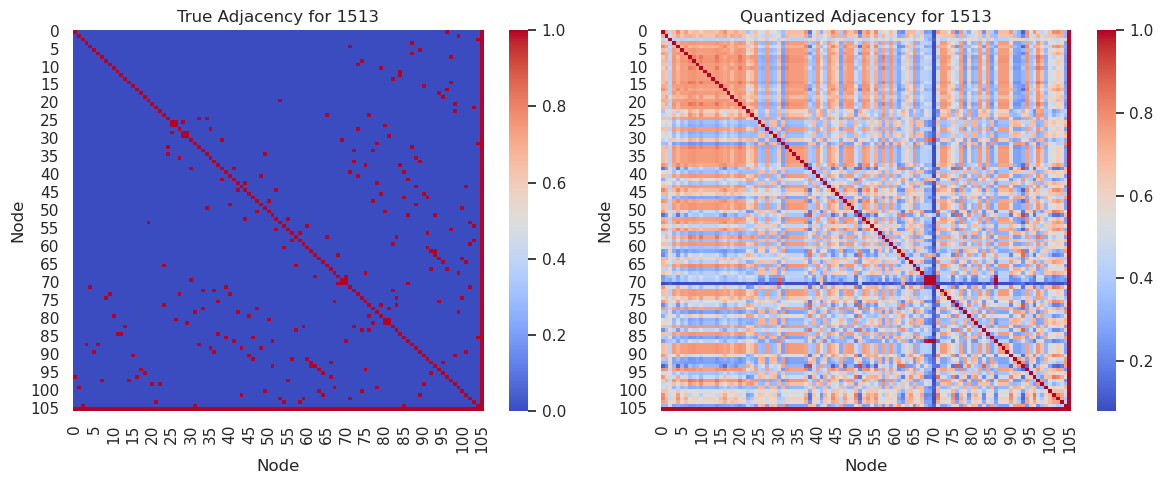

Choose according to: f1
Acc 0.5327 | Recall 0.9774 | Precision 0.0605 | F1 0.1140


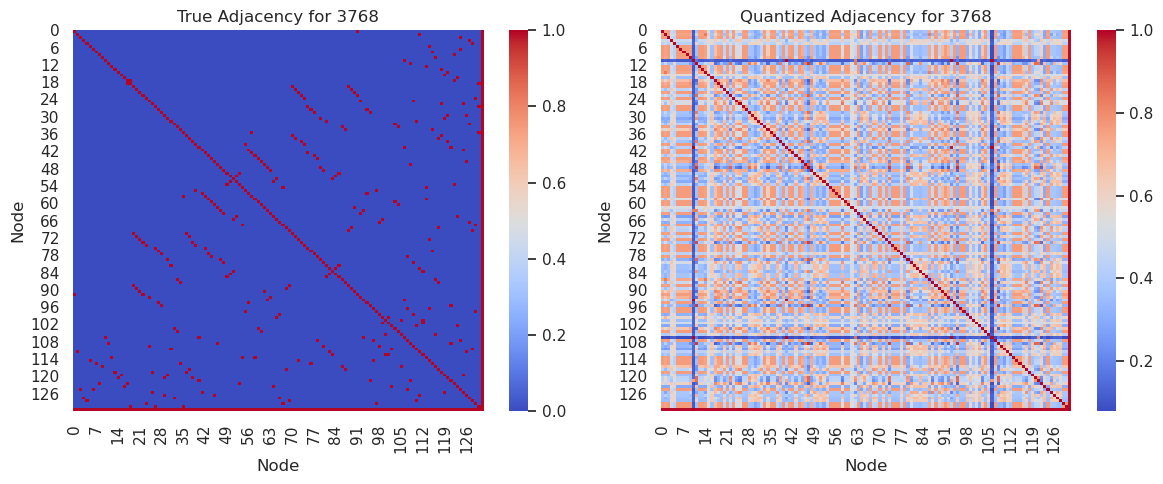

Choose according to: precision
Acc 0.5307 | Recall 0.9841 | Precision 0.0701 | F1 0.1308


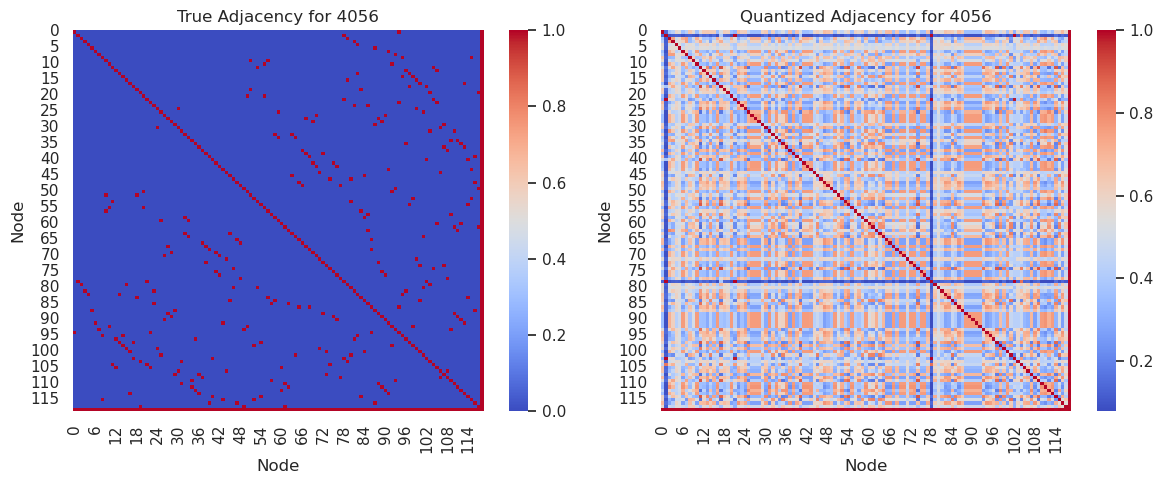

Choose according to: random
Acc 0.5887 | Recall 0.9833 | Precision 0.2622 | F1 0.4140


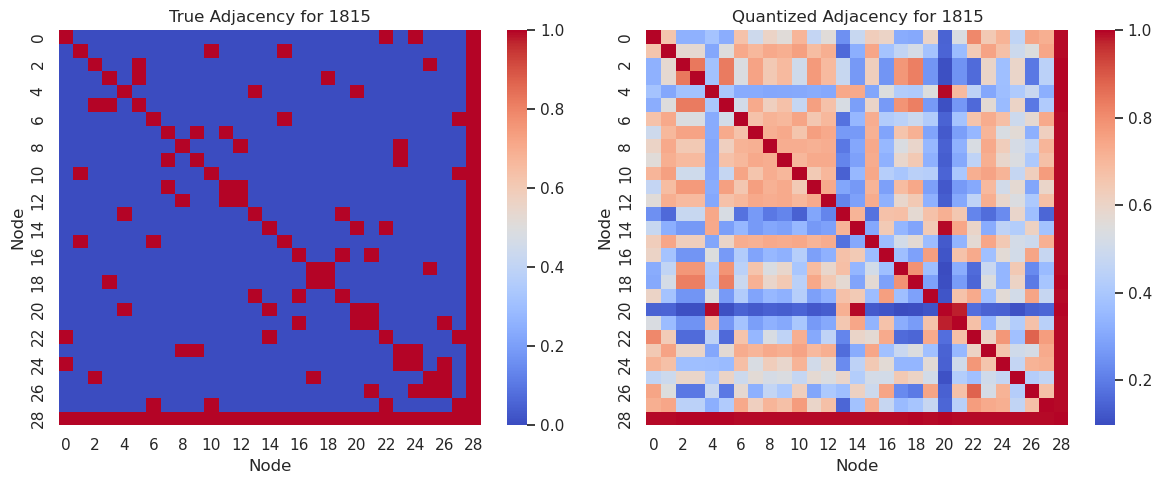

Choose according to: random
Acc 0.5356 | Recall 1.0000 | Precision 0.2348 | F1 0.3804


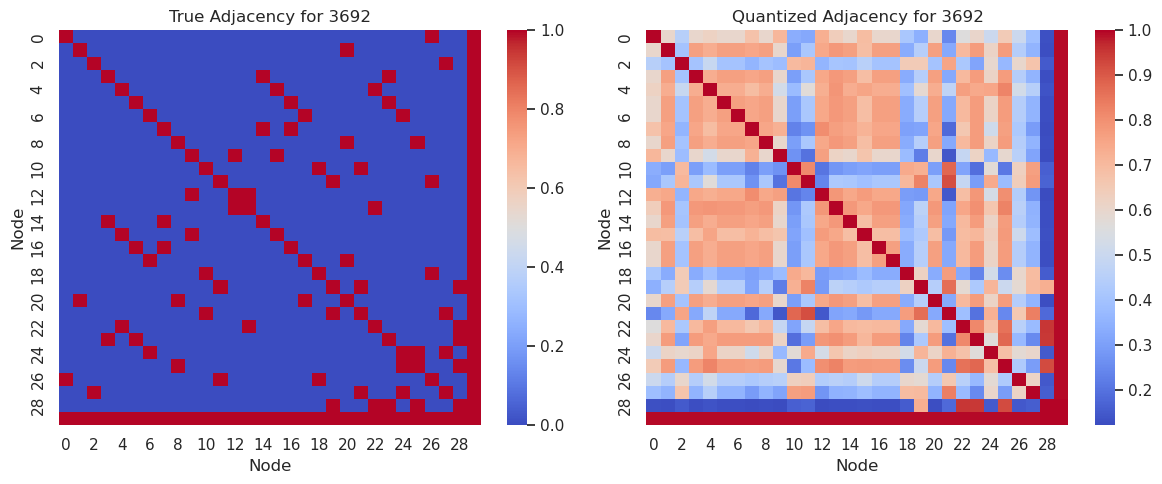

Choose according to: random
Acc 0.6842 | Recall 0.9730 | Precision 0.4045 | F1 0.5714


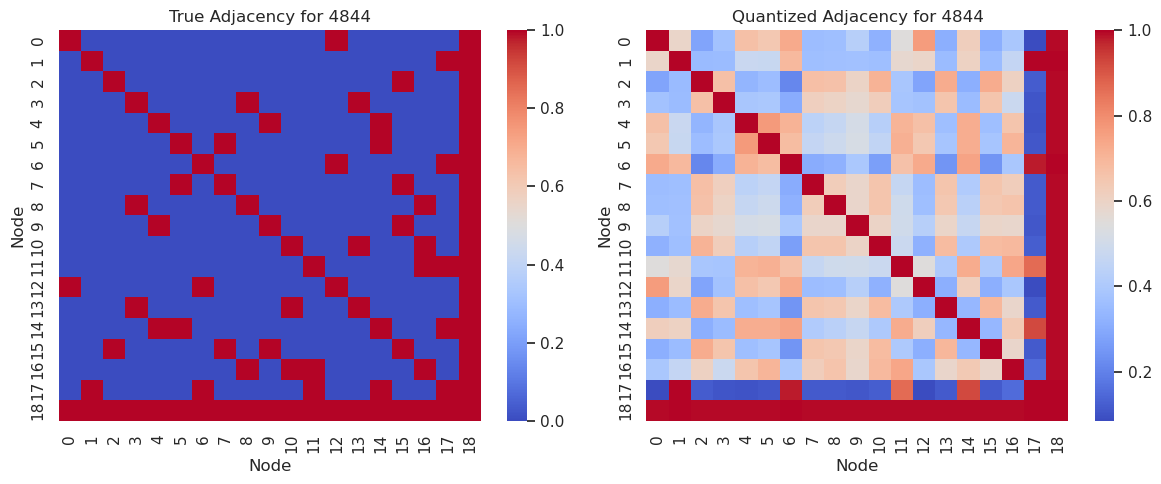

Choose according to: random
Acc 0.6838 | Recall 0.9783 | Precision 0.3629 | F1 0.5294


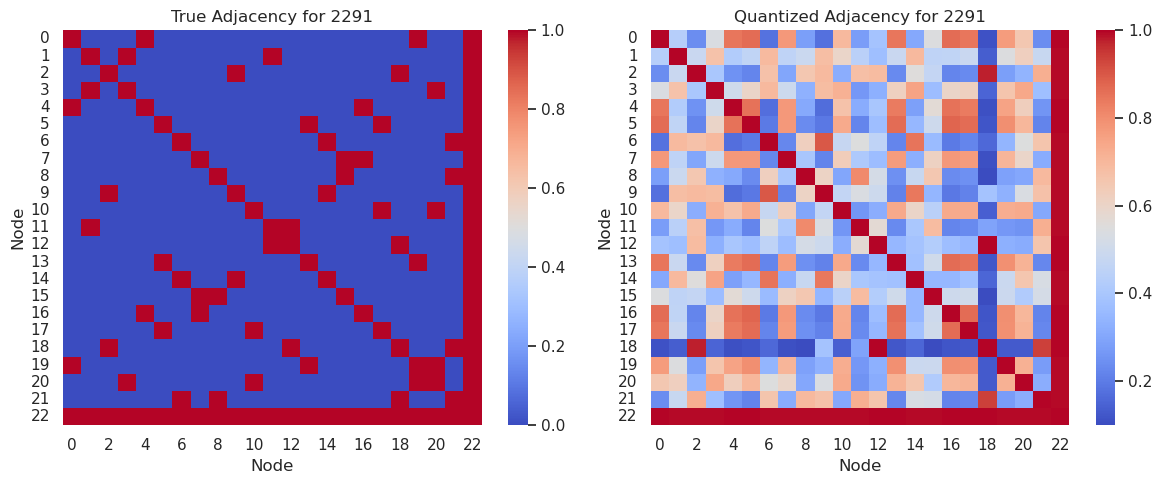

Choose according to: random
Acc 0.4360 | Recall 1.0000 | Precision 0.2021 | F1 0.3362


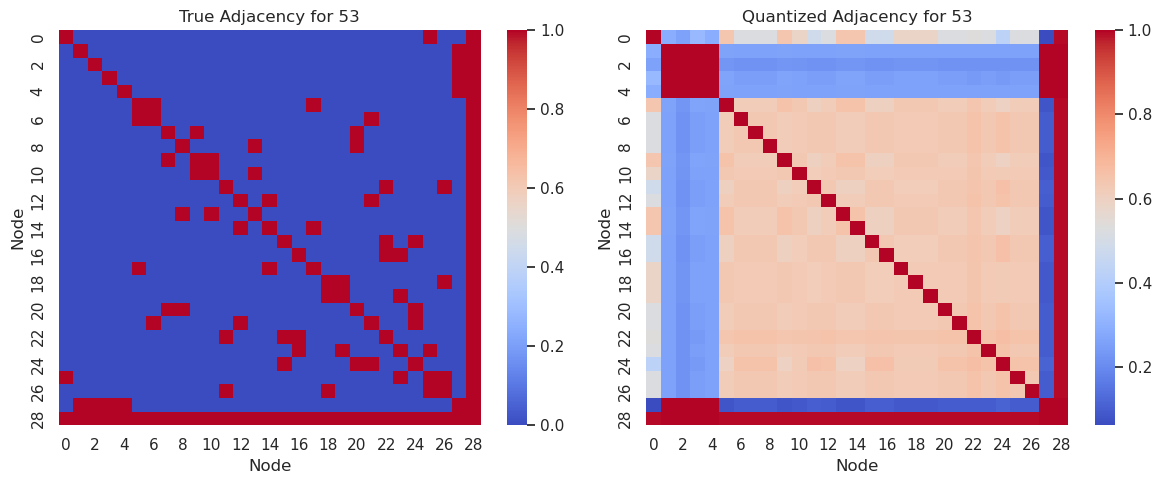

Choose according to: random
Acc 0.7059 | Recall 1.0000 | Precision 0.4521 | F1 0.6226


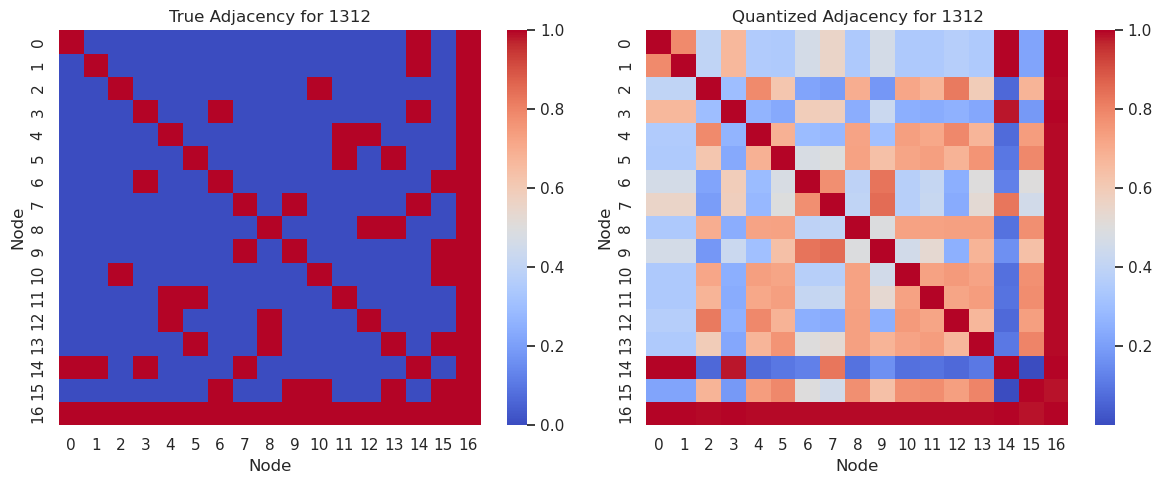

Choose according to: random
Acc 0.6050 | Recall 1.0000 | Precision 0.2345 | F1 0.3799


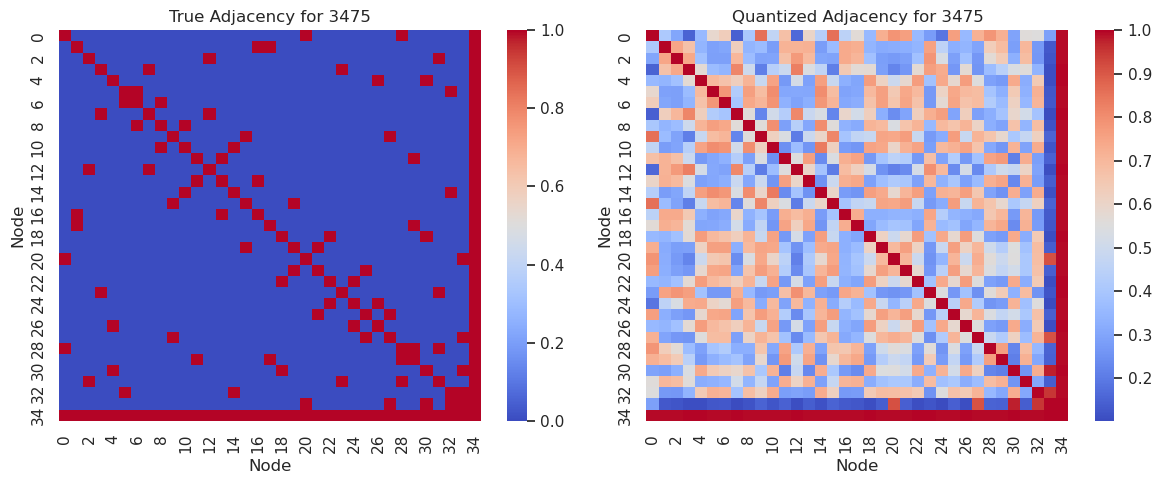

Choose according to: random
Acc 0.7316 | Recall 1.0000 | Precision 0.4396 | F1 0.6107


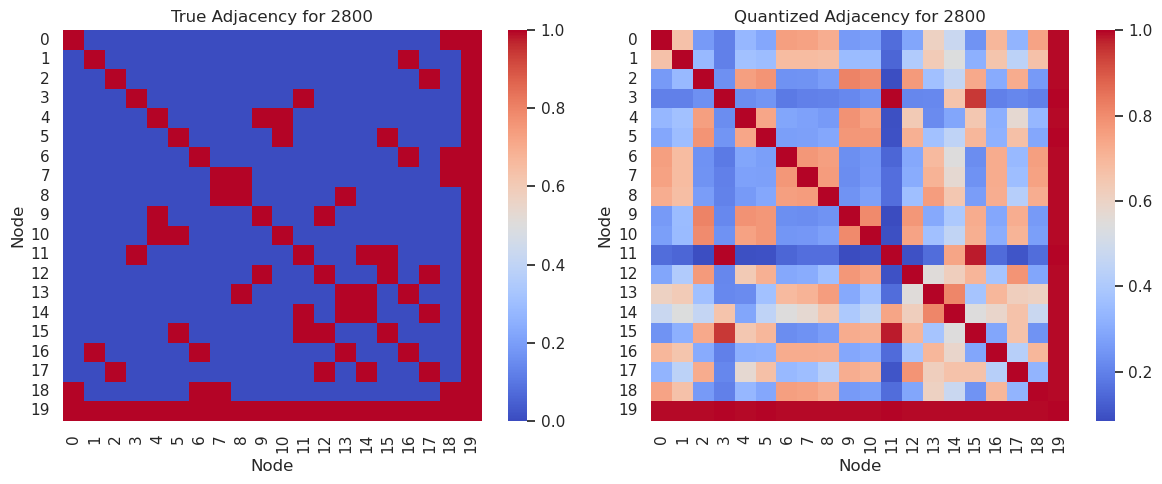

Choose according to: random
Acc 0.6268 | Recall 1.0000 | Precision 0.2957 | F1 0.4564


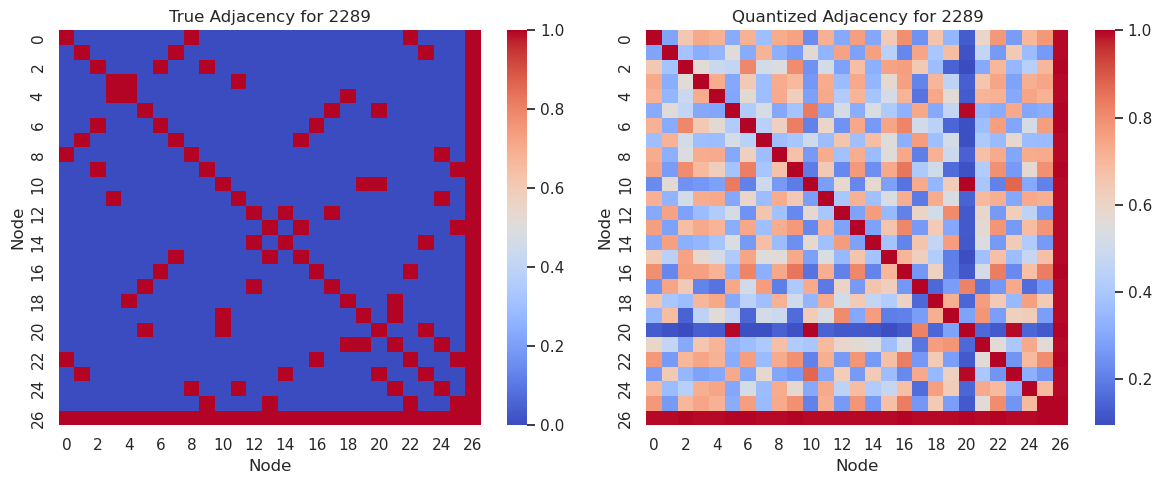

Choose according to: random
Acc 0.7333 | Recall 1.0000 | Precision 0.4921 | F1 0.6596


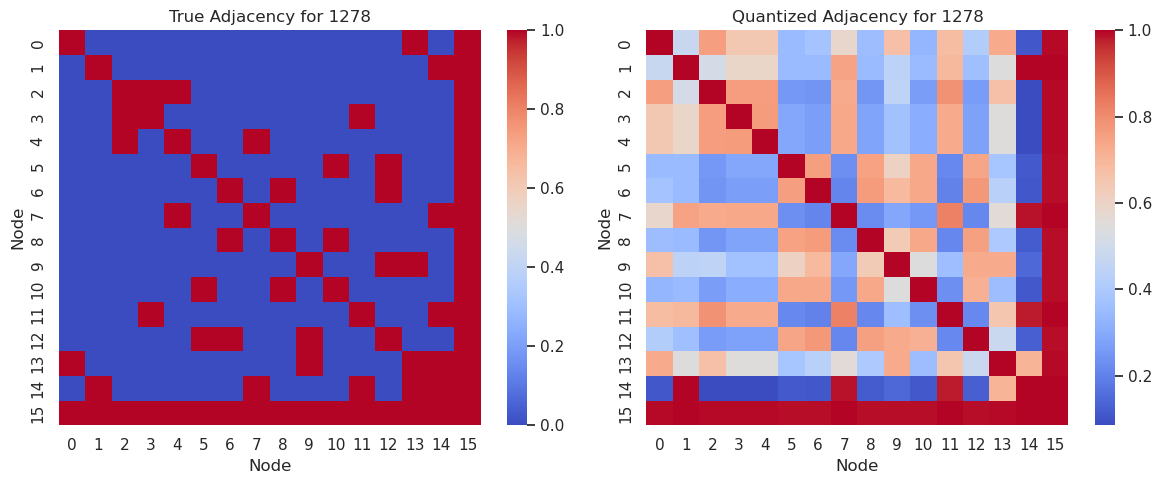

In [24]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

def plot_adjacency(i, adj_quantized, adj_true=None):
    """
    绘制量化后的邻接矩阵（以及可选的真实邻接矩阵）。
    
    参数：
        i: 图像索引或标识
        adj_quantized: 量化后的邻接矩阵 (tensor)
        adj_true: 真实的邻接矩阵 (tensor，可选)
    """
    adj_quantized_np = adj_quantized.cpu().numpy()

    if adj_true is not None:
        adj_true_np = adj_true.cpu().numpy()
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        sns.heatmap(adj_true_np, cmap='coolwarm', ax=axes[0])
        axes[0].set_title(f"True Adjacency for {i}")
        axes[0].set_xlabel("Node")
        axes[0].set_ylabel("Node")
        
        sns.heatmap(adj_quantized_np, cmap='coolwarm', ax=axes[1])
        axes[1].set_title(f"Quantized Adjacency for {i}")
        axes[1].set_xlabel("Node")
        axes[1].set_ylabel("Node")
    else:
        plt.figure(figsize=(6, 5))
        sns.heatmap(adj_quantized_np, cmap='coolwarm')
        plt.title(f"Quantized Adjacency Heatmap for test graph {i}")
        plt.xlabel("Node")
        plt.ylabel("Node")
    
    plt.tight_layout()
    plt.show()


def recover_full_adj_from_upper(adj_pred_labels, num_nodes, device="cpu"):
    """
    将上三角预测值恢复为完整对称邻接矩阵。
    
    Args:
        adj_pred_labels: 上三角预测标签，一维 tensor，长度为 num_nodes * (num_nodes - 1) // 2
        num_nodes: 节点数
        device: 可选，返回的矩阵放在哪个 device 上
        
    Returns:
        adj_reconstructed: 恢复后的完整邻接矩阵 (num_nodes x num_nodes)，类型为 int tensor
    """
    adj_reconstructed = torch.zeros((num_nodes, num_nodes), dtype=adj_pred_labels.dtype, device=device)
    
    triu_indices = torch.triu_indices(num_nodes, num_nodes, offset=1)
    adj_reconstructed[triu_indices[0], triu_indices[1]] = adj_pred_labels
    adj_reconstructed[triu_indices[1], triu_indices[0]] = adj_pred_labels  # 对称填充
    adj_reconstructed.fill_diagonal_(1)

    return adj_reconstructed

def find_key_for_element(d, element):
    for key, lst in d.items():
        if element in lst:
            # print(key)
            return key
    print("Not found")
    return None


adj_trues = [complete_res[i]['adj_true'] for i in all_indices]
adj_preds = [recover_full_adj_from_upper(complete_res[i]['adj_pred'],complete_res[i]['num_nodes']) for i in all_indices]
center_nodes = [complete_res[i]['idx'] for i in all_indices]
for ind,(cn,adj_p,adj_t) in enumerate(zip(center_nodes,adj_preds,adj_trues)):
    i  = all_indices[ind]
    print('Choose according to:',find_key_for_element(random_all_nodes_indices,i))
    print(
        f"Acc {complete_res[i]['accuracy']:.4f} | Recall {complete_res[i]['recall']:.4f} | Precision {complete_res[i]['precision']:.4f} | F1 {complete_res[i]['f1']:.4f}"
    ) 
    # print(adj_t.shape,adj_p.shape)
    plot_adjacency(cn, adj_p, adj_t)  
